# Airlines On-time Performance Data
## by Suresh K

## Preliminary Wrangling

> The US Department of Transport Bureau of Statistics publishes Flight on-time monthly data
the dataset primarly show the timeliness of flights, their origin and destimation details. Further details about the dataset can be found at https://www.transtats.bts.gov/Fields.asp
The data is avaiable at https://www.transtats.bts.gov/DL_SelectFields.asp for public to download. 

> For this Analysis let us cosider latest data available, that is first 2 quarters of 2019. Jan to Jun 2019 data has been downloaded in 6 seperate comma seperated file.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df_jan = pd.read_csv('T_ONTIME_REPORTING_Jan_2019.csv',
                     engine='c')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df_jan.describe(include='all'))

            YEAR   QUARTER     MONTH   DAY_OF_MONTH    DAY_OF_WEEK  \
count   583985.0  583985.0  583985.0  583985.000000  583985.000000   
unique       NaN       NaN       NaN            NaN            NaN   
top          NaN       NaN       NaN            NaN            NaN   
freq         NaN       NaN       NaN            NaN            NaN   
mean      2019.0       1.0       1.0      15.960088       3.835626   
std          0.0       0.0       0.0       8.987942       1.921899   
min       2019.0       1.0       1.0       1.000000       1.000000   
25%       2019.0       1.0       1.0       8.000000       2.000000   
50%       2019.0       1.0       1.0      16.000000       4.000000   
75%       2019.0       1.0       1.0      24.000000       5.000000   
max       2019.0       1.0       1.0      31.000000       7.000000   

           FL_DATE OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER  \
count       583985            583985          583985.000000     583985   
unique     

In [5]:
pd.options.display.max_columns = None
display(df_jan.sample(5))

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
511243  2019        1      1             6            7  2019-01-06   
32264   2019        1      1            12            6  2019-01-12   
193445  2019        1      1            25            5  2019-01-25   
465079  2019        1      1            19            6  2019-01-19   
353574  2019        1      1            30            3  2019-01-30   

       OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  \
511243                DL                  19790         DL   N918DE   
32264                 AA                  19805         AA   N839NN   
193445                WN                  19393         WN   N415WN   
465079                NK                  20416         NK   N605NK   
353574                UA                  19977         UA   N39418   

        OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
511243               2274              10994                1099402   
32264                 289              15304                1530402   
193445               2291              14683                1468305   
465079               1068              14747                1474703   
353574               1727              13204                1320402   

        ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
511243                  30994    CHS   Charleston, SC               SC   
32264                   33195    TPA        Tampa, FL               FL   
193445                  33214    SAT  San Antonio, TX               TX   
465079                  30559    SEA      Seattle, WA               WA   
353574                  31454    MCO      Orlando, FL               FL   

        ORIGIN_STATE_FIPS ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  \
511243                 45  South Carolina          37            10397   
32264                  12         Florida          33            14107   
193445                 48           Texas          74            14679   
465079                 53      Washington          93            12889   
353574                 12         Florida          33            11618   

        DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID DEST DEST_CITY_NAME  \
511243              1039707                30397  ATL    Atlanta, GA   
32264               1410702                30466  PHX    Phoenix, AZ   
193445              1467903                33570  SAN  San Diego, CA   
465079              1288903                32211  LAS  Las Vegas, NV   
353574              1161802                31703  EWR     Newark, NJ   

       DEST_STATE_ABR  DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  CRS_DEP_TIME  \
511243             GA               13       Georgia        34           830   
32264              AZ                4       Arizona        81          2001   
193445             CA                6    California        91           925   
465079             NV               32        Nevada        85           600   
353574             NJ               34    New Jersey        21           600   

        DEP_TIME  DEP_DELAY  DEP_DELAY_NEW  DEP_DEL15  DEP_DELAY_GROUP  \
511243     827.0       -3.0            0.0        0.0             -1.0   
32264     1943.0      -18.0            0.0        0.0             -2.0   
193445     932.0        7.0            7.0        0.0              0.0   
465079     551.0       -9.0            0.0        0.0             -1.0   
353574     553.0       -7.0            0.0        0.0             -1.0   

       DEP_TIME_BLK  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  \
511243    0800-0859      12.0       839.0      923.0      3.0           950   
32264     2000-2059      12.0      1955.0     2211.0     17.0          2250   
193445    0900-0959      13.0       945.0     1055.0     20.0          1035   
465079    0600-0659      14.0       605.0      802.0      6.0           824   
353574    0600-0659      11.0       604.0      801.0      9.0           834   

   

###### Let us only condsidered delayed flights which are not cancelled or diverted as they form the bulk of the data 
###### Also Diverted and Cancelled flight most often will have Weather conditions, which could be beyond the control to remediate

In [6]:
df_jan[df_jan['DIV_REACHED_DEST'].notnull()].sample(5)

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
209160  2019        1      1            27            7  2019-01-27   
402959  2019        1      1            20            7  2019-01-20   
174204  2019        1      1            22            2  2019-01-22   
475110  2019        1      1            22            2  2019-01-22   
342570  2019        1      1             3            4  2019-01-03   

       OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  \
209160                OH                  20397         OH   N215PS   
402959                WN                  19393         WN   N260WN   
174204                WN                  19393         WN   N760SW   
475110                OO                  20304         OO   N606SK   
342570                YX                  20452         YX   N202JQ   

        OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
209160               5163              14100                1410005   
402959               4624              10821                1082106   
174204                293              13204                1320402   
475110               3585              13487                1348702   
342570               5869              12478                1247805   

        ORIGIN_CITY_MARKET_ID ORIGIN  ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
209160                  34100    PHL  Philadelphia, PA               PA   
402959                  30852    BWI     Baltimore, MD               MD   
174204                  31454    MCO       Orlando, FL               FL   
475110                  31650    MSP   Minneapolis, MN               MN   
342570                  31703    JFK      New York, NY               NY   

        ORIGIN_STATE_FIPS ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  \
209160                 42    Pennsylvania          23            10361   
402959                 24        Maryland          35            14576   
174204                 12         Florida          33            13198   
475110                 27       Minnesota          63            13232   
342570                 36        New York          22            11298   

        DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID DEST         DEST_CITY_NAME  \
209160              1036105                30361  ART          Watertown, NY   
402959              1457606                34576  ROC          Rochester, NY   
174204              1319801                33198  MCI        Kansas City, MO   
475110              1323202                30977  MDW            Chicago, IL   
342570              1129806                30194  DFW  Dallas/Fort Worth, TX   

       DEST_STATE_ABR  DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  CRS_DEP_TIME  \
209160             NY               36      New York        22          1819   
402959             NY               36      New York        22          1115   
174204             MO               29      Missouri        64          2120   
475110             IL               17      Illinois        41          1251   
342570             TX               48         Texas        74          1820   

        DEP_TIME  DEP_DELAY  DEP_DELAY_NEW  DEP_DEL15  DEP_DELAY_GROUP  \
209160    1817.0       -2.0            0.0        0.0             -1.0   
402959    1111.0       -4.0            0.0        0.0             -1.0   
174204    2126.0        6.0            6.0        0.0              0.0   
475110    1349.0       58.0           58.0        1.0              3.0   
342570    1814.0       -6.0            0.0        0.0             -1.0   

       DEP_TIME_BLK  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  \
209160    1800-1859      17.0      1834.0     2139.0      8.0          1940   
402959    1100-1159      12.0      1123.0        NaN      NaN          1230   
174204    2100-2159       7.0      2133.0       46.0     12.0          2315   
475110    1200-1259      56.0      1445.0      956.0      7.0          1441   
342570    1800-1859      61.0

In [7]:

df_jan[df_jan['DIVERTED']!= 0].sample(10) 

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
357177  2019        1      1            28            1  2019-01-28   
502248  2019        1      1            13            7  2019-01-13   
311115  2019        1      1            25            5  2019-01-25   
271269  2019        1      1             6            7  2019-01-06   
203471  2019        1      1             4            5  2019-01-04   
503383  2019        1      1            15            2  2019-01-15   
463143  2019        1      1            22            2  2019-01-22   
155003  2019        1      1             3            4  2019-01-03   
188618  2019        1      1            24            4  2019-01-24   
227732  2019        1      1             6            7  2019-01-06   

       OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  \
357177                UA                  19977         UA   N77871   
502248                AS                  19930         AS   N285VA   
311115                DL                  19790         DL   N359NW   
271269                AS                  19930         AS   N638VA   
203471                OH                  20397         OH   N206PS   
503383                AS                  19930         AS   N613AS   
463143                NK                  20416         NK   N683NK   
155003                WN                  19393         WN   N8503A   
188618                WN                  19393         WN   N8716B   
227732                DL                  19790         DL   N776DE   

        OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
357177                597              12889                1288903   
502248               1025              12478                1247805   
311115               2470              12953                1295304   
271269               1127              10821                1082106   
203471               5450              12953                1295304   
503383                538              11630                1163002   
463143                892              13204                1320402   
155003                166              12191                1219102   
188618               1710              13204                1320402   
227732                395              14869                1486903   

        ORIGIN_CITY_MARKET_ID ORIGIN    ORIGIN_CITY_NAME ORIGIN_STATE_ABR  \
357177                  32211    LAS       Las Vegas, NV               NV   
502248                  31703    JFK        New York, NY               NY   
311115                  31703    LGA        New York, NY               NY   
271269                  30852    BWI       Baltimore, MD               MD   
203471                  31703    LGA        New York, NY               NY   
503383                  31517    FAI       Fairbanks, AK               AK   
463143                  31454    MCO         Orlando, FL               FL   
155003                  31453    HOU         Houston, TX               TX   
188618                  31454    MCO         Orlando, FL               FL   
227732                  34614    SLC  Salt Lake City, UT               UT   

        ORIGIN_STATE_FIPS ORIGIN_STATE_NM  ORIGIN_WAC  DEST_AIRPORT_ID  \
357177                 32          Nevada          85            13930   
502248                 36        New York          22            14771   
311115                 36        New York          22            14027   
271269                 24        Maryland          35            14771   
203471                 36        New York          22            11267   
503383                  2          Alaska           1            14709   
463143                 12         Florida          33            11433   
155003                 48           Texas          74            13851   
188618                 12         Florida          33            12191   
227732                 49            Utah          87            14570   


In [8]:
df_feb = pd.read_csv('T_ONTIME_REPORTING_Feb_2019.csv',
                     engine='c')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (48,69,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df_mar = pd.read_csv('T_ONTIME_REPORTING_Mar_2019.csv',
                     engine='c')

In [10]:
df_apr = pd.read_csv('T_ONTIME_REPORTING_Apr_2019.csv',
                     engine='c')

In [11]:
df_may = pd.read_csv('T_ONTIME_REPORTING_May_2019.csv',
                     engine='c')

In [12]:
df_jun = pd.read_csv('T_ONTIME_REPORTING_Jun_2019.csv',
                     engine='c')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (42,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Concatinate all frames to 1 dataframe
frames = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun]
df_H12019 = pd.concat(frames, sort=True)

In [14]:
df_H12019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634338 entries, 0 to 636690
Data columns (total 77 columns):
ACTUAL_ELAPSED_TIME        float64
AIR_TIME                   float64
ARR_DEL15                  float64
ARR_DELAY                  float64
ARR_DELAY_GROUP            float64
ARR_DELAY_NEW              float64
ARR_TIME                   float64
ARR_TIME_BLK               object
CANCELLATION_CODE          object
CANCELLED                  int64
CARRIER_DELAY              float64
CRS_ARR_TIME               int64
CRS_DEP_TIME               int64
CRS_ELAPSED_TIME           float64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
DEP_DEL15                  float64
DEP_DELAY                  float64
DEP_DELAY_GROUP            float64
DEP_DELAY_NEW              float64
DEP_TIME                   float64
DEP_TIME_BLK               object
DEST                       object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int6

Let us get the data for rest of the months

### The structure of your dataset?

> The dataset is has main sections of data with data fields related to the section
>  - Time Period 
>      - Year, Quater, Month, DayoftheMonth, DayoftheWeek, FlighDate
>  - Airline
>      - Detailed Airlines company and Filght
>  - Origin
>      - Details of originating City and Airport
>  - Destination
>      - Details of Destination City and Airport
>  - Departure Performance
>      - Metrics on depature time and delay
>  - Arrival Performance
>      - Metrics on Arrival time and delay
>  - Cancellation and Diversions 
>      - Indicators of cancelled and divereted flights
>  - Flight Summary
>      - Metrics on planned and Actual flight time, distances etc.
>  - Cause of Delay
>  - Gate return to origin Aiprport
>  - Diverted flight details

Further to the data fields are dervided into bin certain field like
> - Delay Time block - The hour duration of the day like 1900-1959
> - Delay Time Group -  Blocks of every 15 min ,  0-15 is 0 and 0-30 is 1 and so on, to indicate the sevirity of the delay.
> - Distant Group - The blocks of 250 kms is indicated as distant group.  first 250 kms is 1 and upto 500 kms is 2 and so on.
> - Delay in minutes due to each Catergories of delay is shown seperately to show all causes of delay

### The main feature(s) of interest.

> The focus of the analysis is to find out what are the primary cause of day, In term of Day of the week , time of the day , routes causing delays

### The features in the dataset that support the investigation.

> By general sense we could say weather could cause the most delay follow by NAS ( Natioanal Air Saftey ) technical reasons. We could see by further doing the analysis

#### Let us for now ignore the delays due to flight cancellations and diverstions as it quite obvious will cause delay. We will come back to it latter

In [15]:
# We dont want both diverted and cancelled flights
df_ndely = df_H12019.query('CANCELLED != 1 & DIVERTED != 1')
df_ndely.sample(5)

ACTUAL_ELAPSED_TIME  AIR_TIME  ARR_DEL15  ARR_DELAY  ARR_DELAY_GROUP  \
573664                141.0     126.0        0.0       13.0              0.0   
322966                 61.0      33.0        0.0        1.0              0.0   
356795                151.0     113.0        1.0      319.0             12.0   
75459                  81.0      60.0        1.0     1247.0             12.0   
424640                122.0      90.0        0.0        4.0              0.0   

        ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  CANCELLED  \
573664           13.0     913.0    0900-0959               NaN          0   
322966            1.0    1546.0    1500-1559               NaN          0   
356795          319.0       3.0    1800-1859               NaN          0   
75459          1247.0    1310.0    1600-1659               NaN          0   
424640            4.0    1528.0    1500-1559               NaN          0   

        CARRIER_DELAY  CRS_ARR_TIME  CRS_DEP_TIME  CRS_ELAPSED_TIME  \
573664            NaN           900           530             150.0   
322966            NaN          1545          1437              68.0   
356795            0.0          1844          1700             164.0   
75459             7.0          1623          1455              88.0   
424640            NaN          1524          1328             116.0   

        DAY_OF_MONTH  DAY_OF_WEEK  DEP_DEL15  DEP_DELAY  DEP_DELAY_GROUP  \
573664             5            3        1.0       22.0              1.0   
322966            31            7        0.0        8.0              0.0   
356795            28            1        1.0      332.0             12.0   
75459             23            3        1.0     1254.0             12.0   
424640            12            3        0.0       -2.0             -1.0   

        DEP_DELAY_NEW  DEP_TIME DEP_TIME_BLK DEST  DEST_AIRPORT_ID  \
573664           22.0     552.0    0001-0559  MCO            13204   
322966            8.0    1445.0    1400-1459  ATL            10397   
356795          332.0    2232.0    1700-1759  ORD            13930   
75459          1254.0    1149.0    1400-1459  DEN            11292   
424640            0.0    1326.0    1300-1359  ATL            10397   

        DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID DEST_CITY_NAME  \
573664              1320402                31454    Orlando, FL   
322966              1039707                30397    Atlanta, GA   
356795              1393007                30977    Chicago, IL   
75459               1129202                30325     Denver, CO   
424640              1039707                30397    Atlanta, GA   

       DEST_STATE_ABR  DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  DISTANCE  \
573664             FL               12       Florida        33       990   
322966             GA               13       Georgia        34       143   
356795             IL               17      Illinois        41       719   
75459              CO                8      Colorado        82       406   
424640             GA               13       Georgia        34       594   

        DISTANCE_GROUP DIV1_AIRPORT  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  \
573664               4          NaN              NaN                  NaN   
322966               1          NaN              NaN                  NaN   
356795               3          NaN              NaN                  NaN   
75459                2          NaN              NaN                  NaN   
424640               3          NaN              NaN                  NaN   

        DIV1_LONGEST_GTIME DIV1_TAIL_NUM  DIV1_TOTAL_GTIME  DIV1_WHEELS_OFF  \
573664                 NaN           NaN               NaN              NaN   
322966                 NaN           NaN               NaN              NaN   
356795                 NaN           NaN               NaN              NaN   
75459                  NaN           NaN               NaN              NaN   
424640                 NaN           NaN 

## Univariate Exploration

###### As we are most interested in the delay timing let us look how much are delay is generally seen.  Let us have closer look at the distribution of delays 

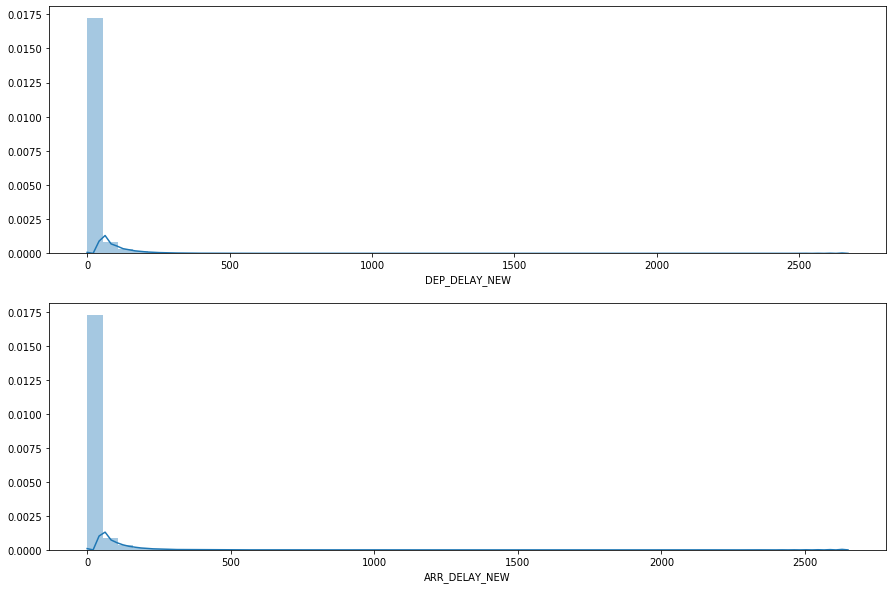

In [16]:
fig, ax = plt.subplots(nrows=2, figsize=[15,10])
sb.distplot(df_ndely['DEP_DELAY_NEW'],
           ax=ax[0])
sb.distplot(df_ndely['ARR_DELAY_NEW'],
           ax=ax[1])

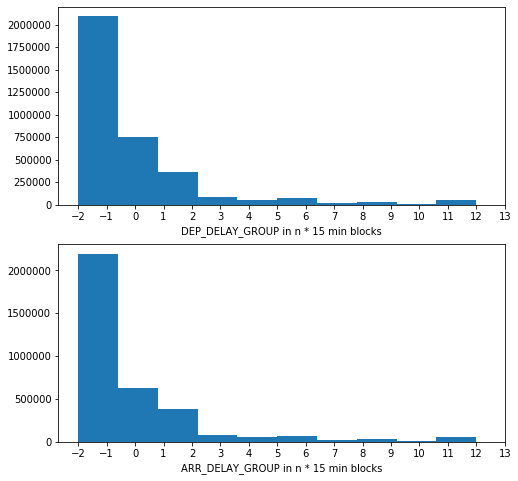

In [17]:
fig, ax = plt.subplots(nrows=2, figsize=[8,8])

var = ['DEP_DELAY_GROUP', 'ARR_DELAY_GROUP']

for i in range(len(var)):
    ax[i].hist(data=df_ndely, x=var[i])
    ax[i].set_xlabel('{} in n * 15 min blocks'.format(var[i]))
    ax[i].set_xticks(np.arange(-2,14,1))    

plt.show()

###### While we could see most of the flights take of early or on-time but we are more interested in delays. Let us haver a closer look at delay more than 15 mins  

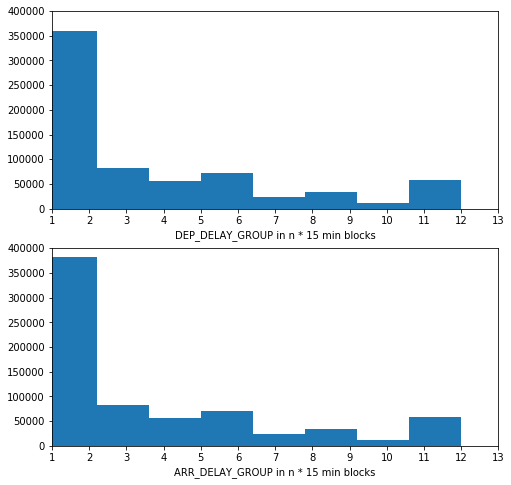

In [18]:
fig, ax = plt.subplots(nrows=2, figsize=[8,8])

var = ['DEP_DELAY_GROUP', 'ARR_DELAY_GROUP']

for i in range(len(var)):
    ax[i].hist(data=df_ndely, x=var[i])
    ax[i].set_xlabel('{} in n * 15 min blocks'.format(var[i]))
    ax[i].set_xlim((1,13))
    ax[i].set_ylim((0,400000))
    ax[i].set_xticks(np.arange(1,14,1))

plt.show()

###### The Depature delay and arrival delay seems to closely related by number of occurances. This could be due to departure delay cause arrival delay . 45 mins, 1 hour, 1 hour 30 and more than 2.5 hours delays seems to be quite common. Let us explore minute by minute delay exploration between -50 to 250 minitues

In [19]:
t_bins = np.arange(min(df_ndely[var[i]]), max(df_ndely[var[i]])+1.0, 1.0)
len(t_bins)

15

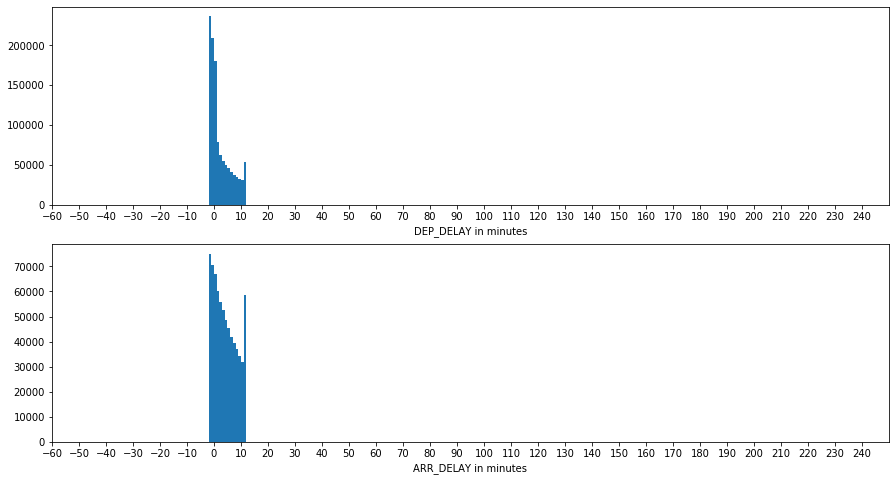

In [194]:
fig, ax = plt.subplots(nrows=2, figsize=[15,8])

var = ['DEP_DELAY', 'ARR_DELAY']

for i in range(len(var)):
    ax[i].hist(data=df_ndely, x=var[i], bins = t_bins, 
               
              )
    ax[i].set_xlabel('{} in minutes'.format(var[i]))
    ax[i].set_xlim(-60, 250)
    ax[i].set_xticks(np.arange(-60,250,10))
#     ax[i].axvline(df_ndely[var[i]].value_counts().index[0],c='r')
plt.show()

###### Let us explore other factors like time of the day and day of the weeks is cause for the delay. Let us filter the delayed flights with material delay

In [21]:
df_dely = df_H12019.query('DEP_DELAY_NEW > 0 | ARR_DELAY_NEW > 0')

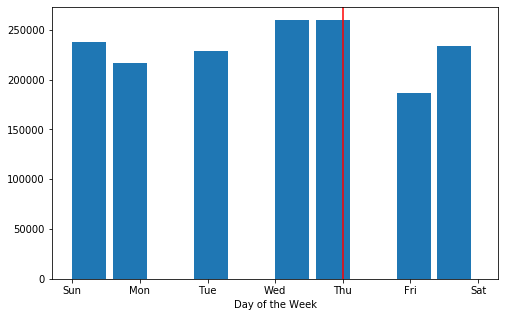

In [22]:
fig, ax = plt.subplots(nrows=1, figsize=[8,5])

var = 'DAY_OF_WEEK'

ax.hist(data=df_dely, x=var, 
        width = 0.5
       )            
ax.set_xlabel('Day of the Week'.format(var))
ax.set_xticklabels(['x', 'Sun','Mon','Tue','Wed','Thu','Fri','Sat']) #, [1,2,3,4,5,6,7])
ax.axvline(df_ndely[var].value_counts().index[0],c='r')
plt.show()

###### Interestingly most delays are on Wednesday and Thurdays followed by saturdays and sundays.  Fridays have least dealys. Let us explore what days cause more than 15 minitues delays

In [23]:
df_dely = df_H12019.query('DEP_DEL15 > 0 | ARR_DEL15 > 0')

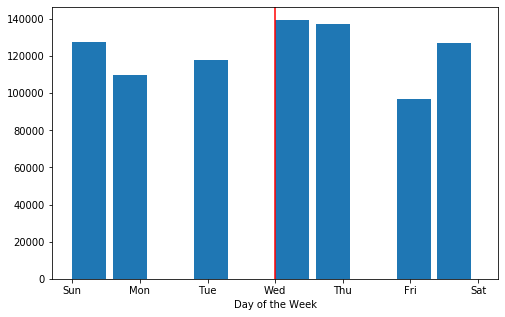

In [24]:
fig, ax = plt.subplots(nrows=1, figsize=[8,5])

var = 'DAY_OF_WEEK'

ax.hist(data=df_dely, x=var, 
        width = 0.5,
        align='mid'
       )            
ax.set_xlabel('Day of the Week'.format(var))
ax.set_xticklabels(['x', 'Sun','Mon','Tue','Wed','Thu','Fri','Sat']) #, [1,2,3,4,5,6,7])
ax.axvline(df_dely[var].value_counts().index[0],c='r')
plt.show()

###### Same tread is seen when delay is greater than 15 minitues. Fridays have least numbers of dealys. 
###### Let us explore the time of the day block to find which tme of the day cause most delays

In [25]:
df_Ddely = df_H12019.query('DEP_DELAY_NEW > 0')

In [26]:
x = df_Ddely['DEP_TIME_BLK'].unique() #.sort()
x.sort()

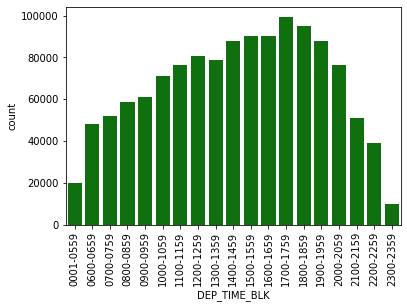

In [27]:
sb.countplot(data=df_Ddely, x='DEP_TIME_BLK',
             color='g',
             order=x,
            );
plt.xticks(rotation=90);

###### We could observe that departure delays are almost evently spread across between 1000 hrs to 2100 hrs, Most number of delays are between evening 5 pm to 6 pm.
######  Let us have a closer look at the arrival delays 

In [28]:
df_Adely = df_H12019.query('ARR_DELAY_NEW > 0')

In [29]:
x = df_Adely['ARR_TIME_BLK'].unique() #.sort()
x.sort()

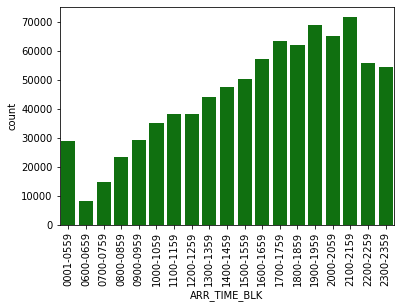

In [30]:
sb.countplot(data=df_dely, x='ARR_TIME_BLK',
             color='g',
             order=x,
            );
plt.xticks(rotation=90);

###### We could observe that arrival delays distribution is different from departure distribution, more delay are see towards end of the day between 4 pm to 10 pm. The least delay observed in morning arrival flights .  This shows there is difference in departure and arrival delay patterns 
######  Let us have look the causes are arrival and departure delay minutes. First let us verify only departure delay more 15 mins at this causes by summing up total delay minutes by categories

In [31]:
df_ddely = df_H12019.query('ARR_DEL15 == 0 and DEP_DEL15 > 0')

In [32]:
df_adely = df_H12019.query('DEP_DEL15 == 0 and ARR_DEL15 > 0 ')

In [33]:
df_xdely = df_H12019.query('DEP_DEL15 > 0 and ARR_DEL15 > 0 ')

In [34]:
x = df_ddely[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum()
x

CARRIER_DELAY          0.0
WEATHER_DELAY          0.0
NAS_DELAY              0.0
SECURITY_DELAY         0.0
LATE_AIRCRAFT_DELAY    0.0
dtype: float64

In [35]:
y = df_adely[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum()
y

CARRIER_DELAY           321838.0
WEATHER_DELAY            44798.0
NAS_DELAY              3818470.0
SECURITY_DELAY            2877.0
LATE_AIRCRAFT_DELAY     169491.0
dtype: float64

In [36]:
z = df_xdely[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum()
z

CARRIER_DELAY          14723949.0
WEATHER_DELAY           2908009.0
NAS_DELAY               8142991.0
SECURITY_DELAY            75373.0
LATE_AIRCRAFT_DELAY    19762370.0
dtype: float64

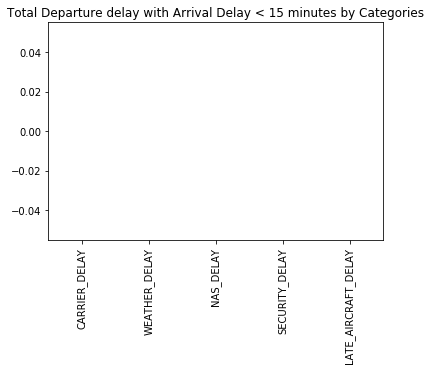

In [37]:
x.plot(kind='bar', title='Total Departure delay with Arrival Delay < 15 minutes by Categories')

###### There are no delays iattributed when Arrival is with in 15 mins of scheduled time and  depature delay of any catergory is less than 15 minutes, This is an interesting finding

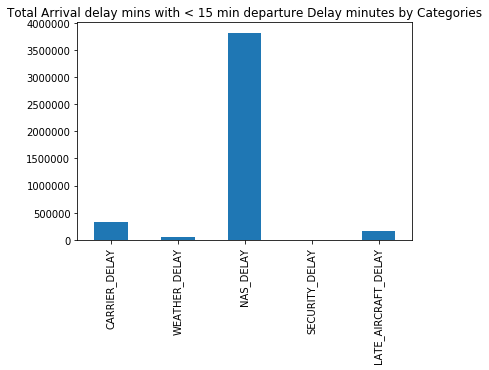

In [38]:
y.plot(kind='bar', title='Total Arrival delay mins with < 15 min departure Delay minutes by Categories')

###### Extremly high duration of delay is due to NAS delay which mean flights are waiting to takeoff and land. This could be due to high air traffic, air traffic control delay.  This give us an indication if we should Arrival delays are primarly caused due to getting signal to land and taxi. We also need to check if any specific airport is causing the landing delays

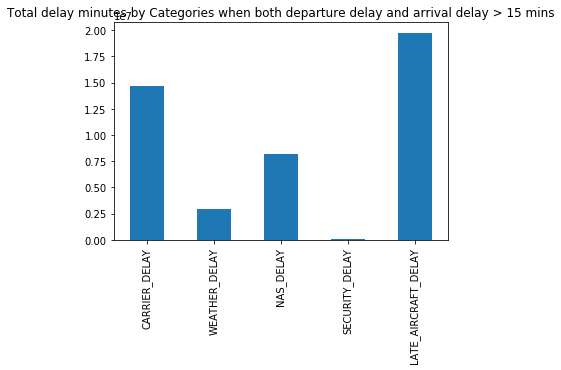

In [39]:
z.plot(kind='bar', title='Total delay minutes by Categories when both departure delay and arrival delay > 15 mins')

###### Late arrival  of aircraft from earlier flight is the most significant cause of delay.  This is called delay propagation in aviation terms. refer https://aspmhelp.faa.gov/index.php/Types_of_Delay. 
###### The delay created by flight operator to prepare the aircraft for flight is next significant cause of delay.  This indicates we have check which airline companies are routes causing the the most delay 

###### As we have noted that arrival major cause of arrival delay is NAS delay which is attribuatable to airports,  Let us move on to Bivariate plot. 

### The distributions of variable(s) of interest as discussed here. 

> **Delay Time Group** is left skewed similarly both Depture Delay time and Arrvial departure time is left skewed. We could observer that most of the flights departed 5 mins earlier and arrived 10 mins sooner.  But there is long tail of arrival delay steadly declining to 120 mins.  But there are outliners on arrival delays.  
> Most of the flights departs on time and interestingly 5 to 1 minitue earlier .  There is gradual decline in the number of depatures from 0 mintures to 110 minitues and bulk of the departure delay minitues are in in this range.

> **Week of the Day** Wednesdays and Thursdays found to have most delays followed by Saturdays and Sundays. Fridays have least delays

> **Time of the Day block** Departure delays are almost evently spread across between 1000 hrs to 2100 hrs, Most number of delays are between evening 5 pm to 6 pm. elay are see towards end of the day between 4 pm to 10 pm. The least delay observed in morning arrival flights 

> **Delay Categories** There are no arrival delay beyound 15 mins delays are not attribute to any of the delay catergories.   The NAS delay is extremly high in case of arrival delay.

### Of the features investigated,  there are some usual distributions.  

> The fligts which are cancelled and Diverted are ommited from analysis as are bound to cause huge delays and could be outliers. Only flight which reached their destinations are included in the analysis.

> Both arrival and departure delay mintues are fairly normally distributed and does not require any transformations.

## Bivariate Exploration

###### Let us check relationship between the variables of interst Arrival Delay, Departure delay, Arrival  delay blocks, Week of the day, Time of the day, Origin , Destinations, routes.

<Figure size 2160x2160 with 0 Axes>

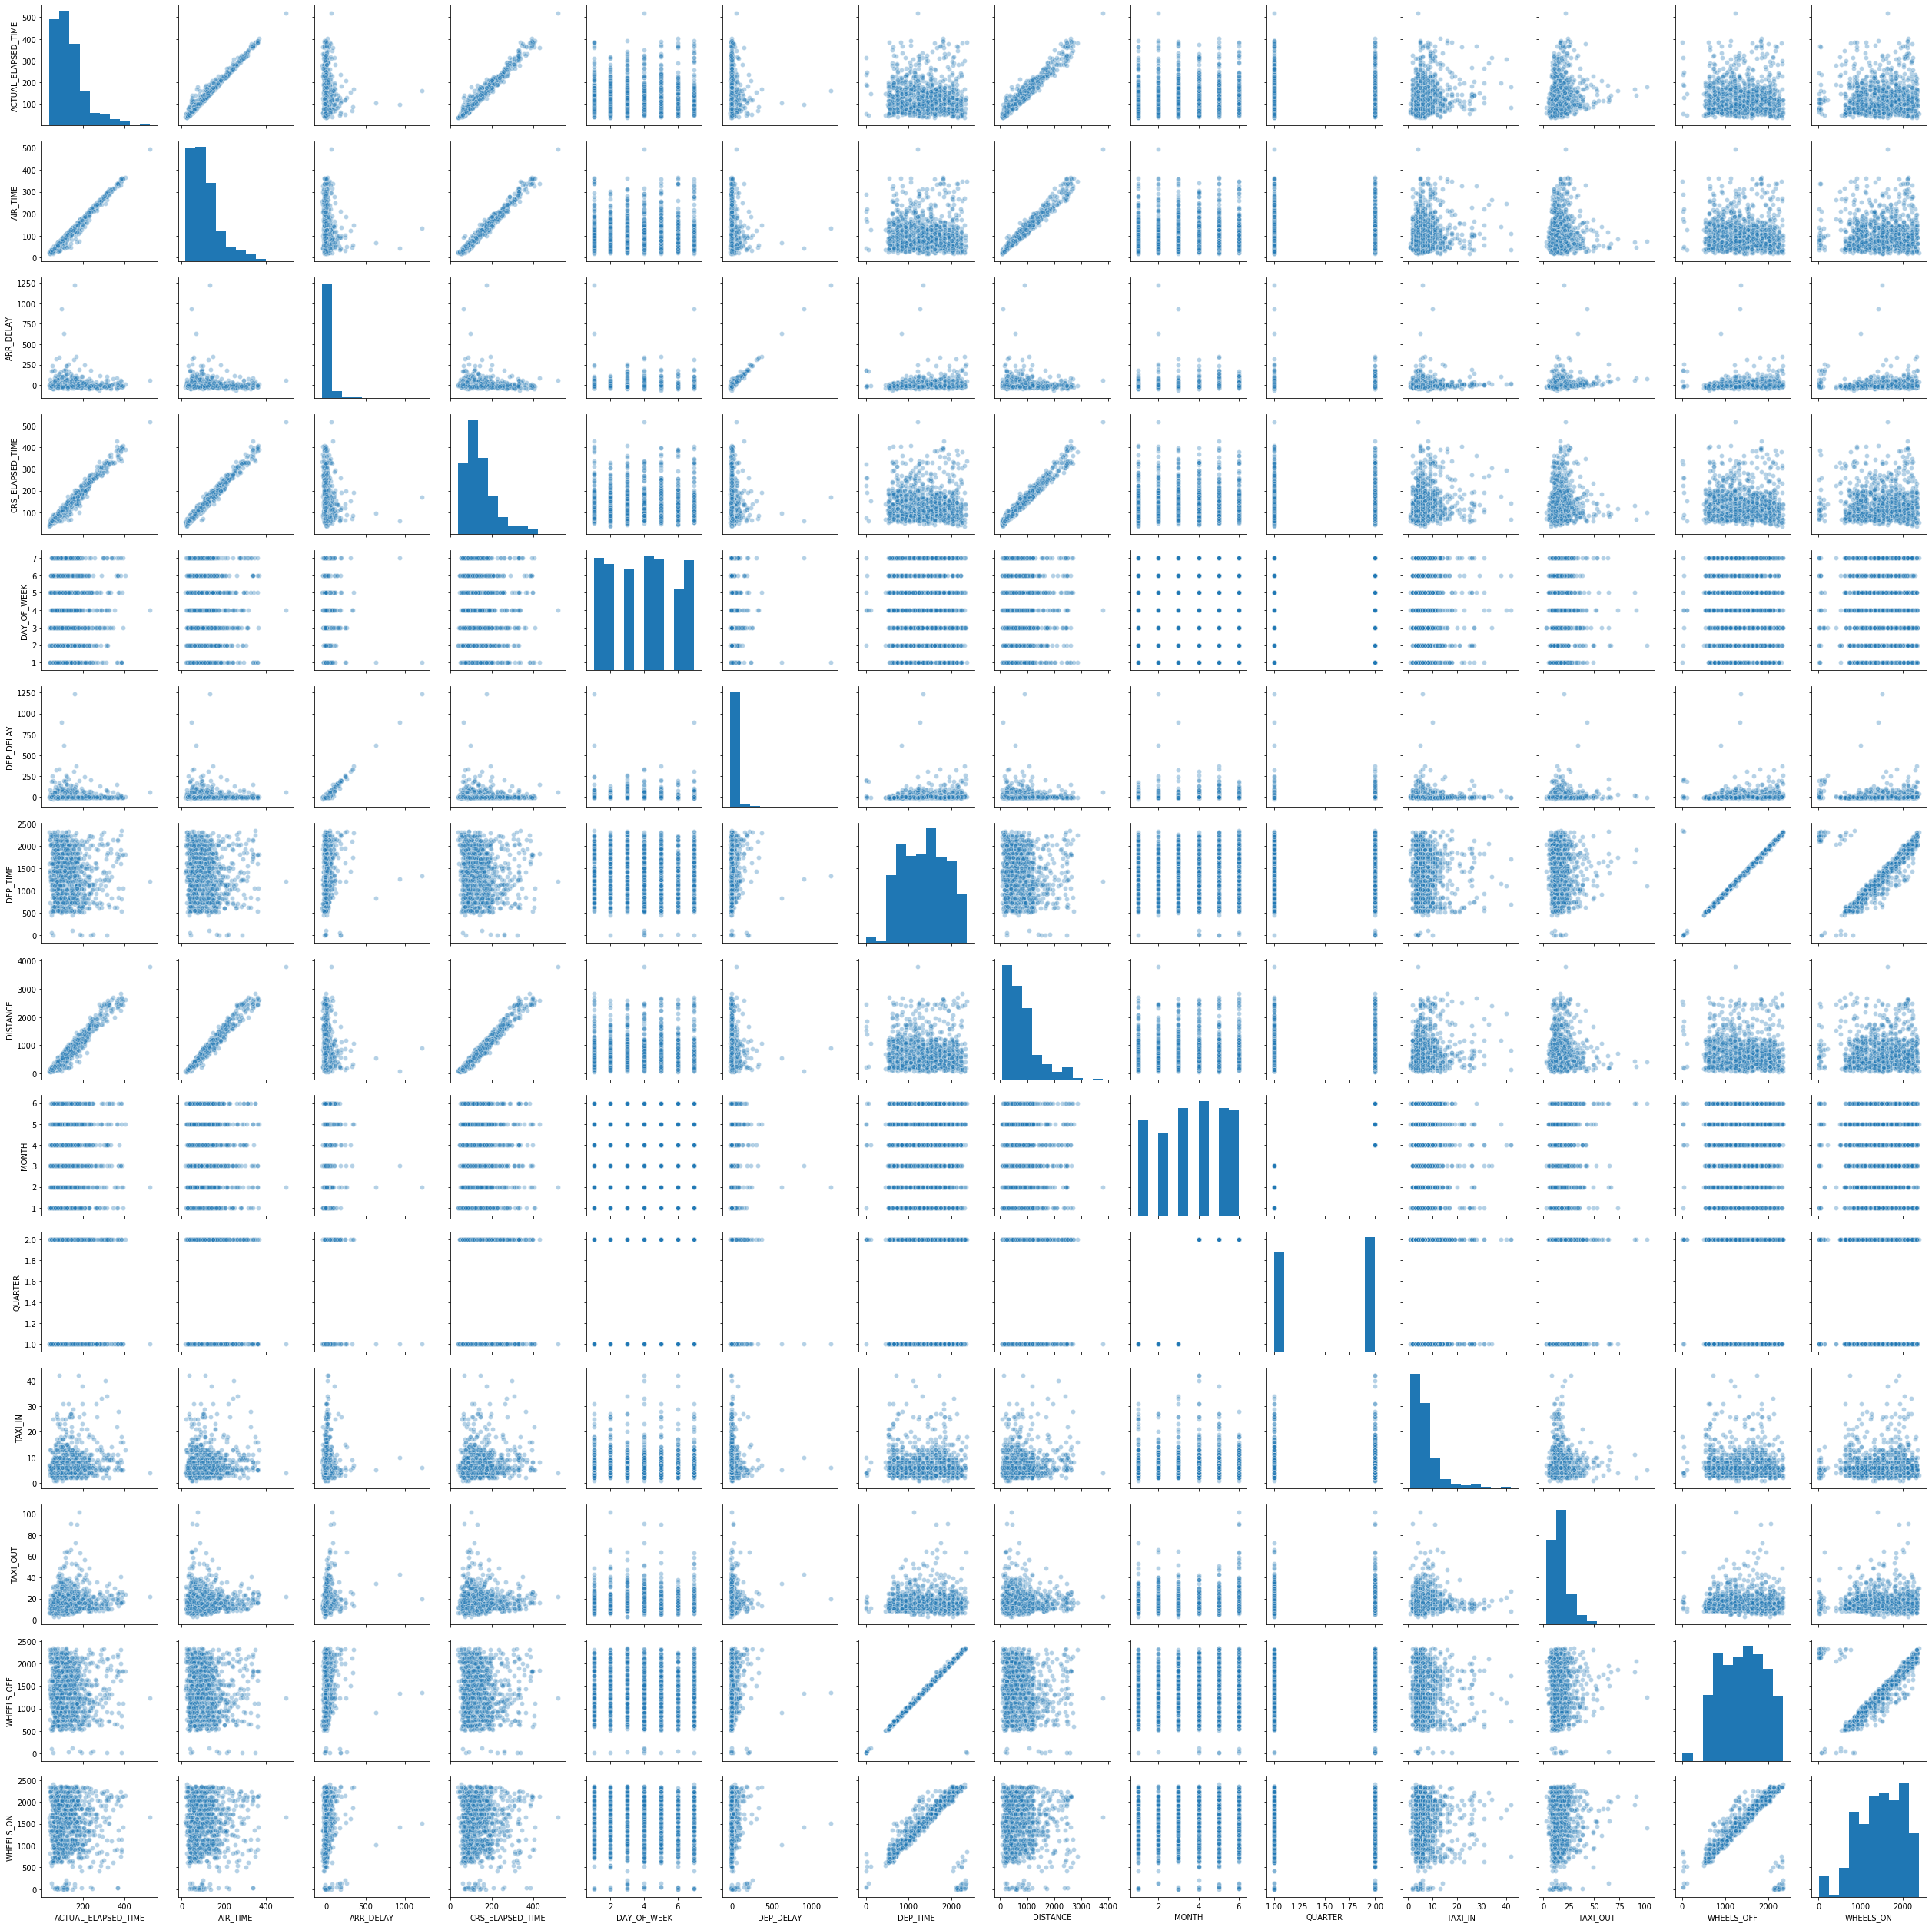

In [40]:
plt.figure(figsize=(30,30));

vars=['ACTUAL_ELAPSED_TIME',
                'AIR_TIME',
                'ARR_DELAY',
#                 'ARR_DELAY_NEW',
#                 'ARR_TIME',
#                 'CRS_ARR_TIME',
#                 'CRS_DEP_TIME',
                'CRS_ELAPSED_TIME',
                'DAY_OF_WEEK',               
                'DEP_DELAY',
#                 'DEP_DELAY_NEW',
                'DEP_TIME',               
#                 'DEST',
#                 'DEST_CITY_MARKET_ID',
                'DISTANCE',
#                 'FIRST_DEP_TIME',
#                 'FLIGHTS',
                'MONTH',
#                 'OP_CARRIER',
#                 'OP_CARRIER_AIRLINE_ID',
#                 'ORIGIN',
#                 'ORIGIN_CITY_MARKET_ID',
                'QUARTER',                    
                'TAXI_IN',
                'TAXI_OUT',
                'WHEELS_OFF',
                'WHEELS_ON']

sb.pairplot(data=df_ndely.sample(1000), 
            vars=vars,
            plot_kws={'alpha':1/3}
            )

###### On closer examination of picture of the scatterplot there are no surprising relationships emerge,  to get better views of the relationship let is plot a heatmap with correlation between variable.  So we could see from the scatter plot, there are not quadratic or cubic relationships seen.  Heat map should of coorelations should give fairly good picture

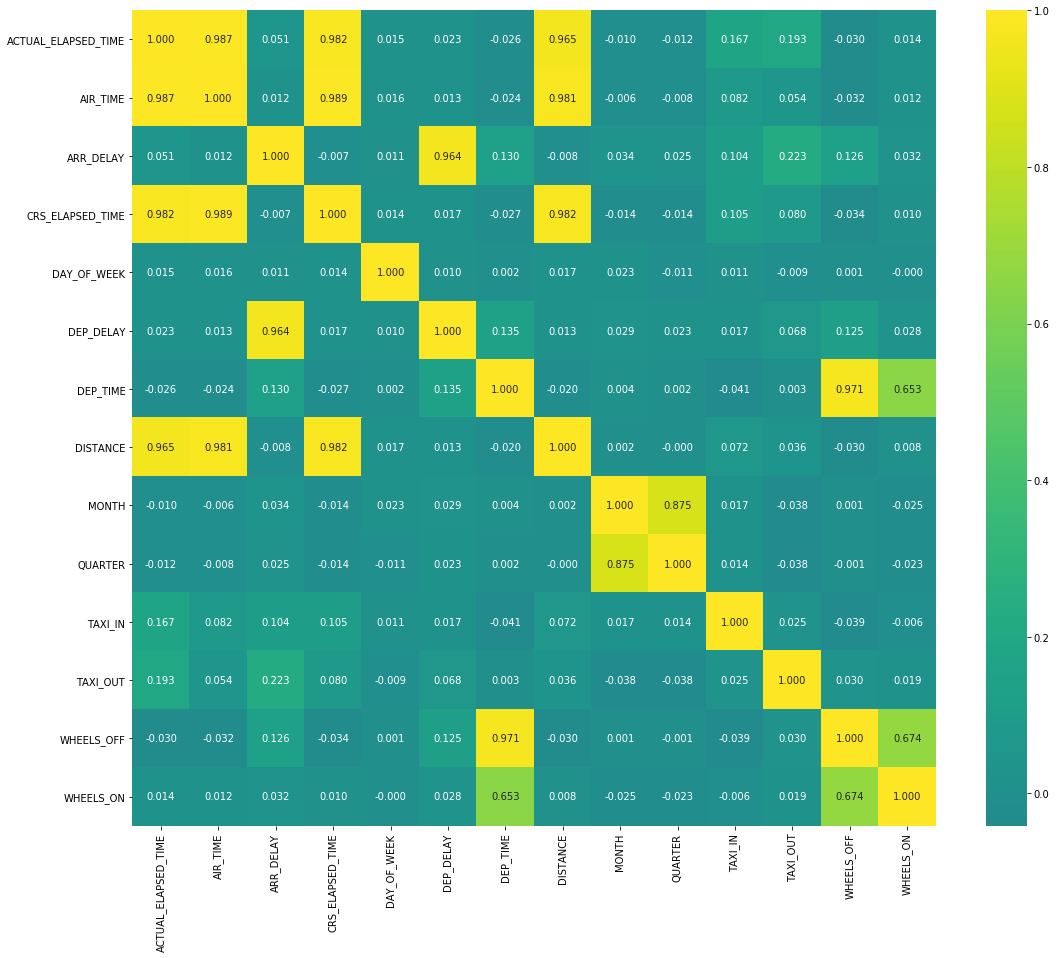

In [41]:
plt.figure(figsize = [18, 15]);
sb.heatmap(df_ndely[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show();

###### We could only see all natural co-relations. Acutal Elapsed Time vs Airtime,  Acutal Elapsed Time vs CRS Elapsed Time ,  Acutal Elapsed Time vs Distance, Air-Time vs Distance, Air-Time vs CRS-elapsed-time, Arr-delay vs Departure-Delay,    CRS Elapsed Time vs distance,  Departure time vs Wheels off, Departure time vs Wheels on,  Wheels on vs Wheels off,  

###### Let us check pairwise relationships.  Arrival delay minutes by airports to understand if there are any relationship

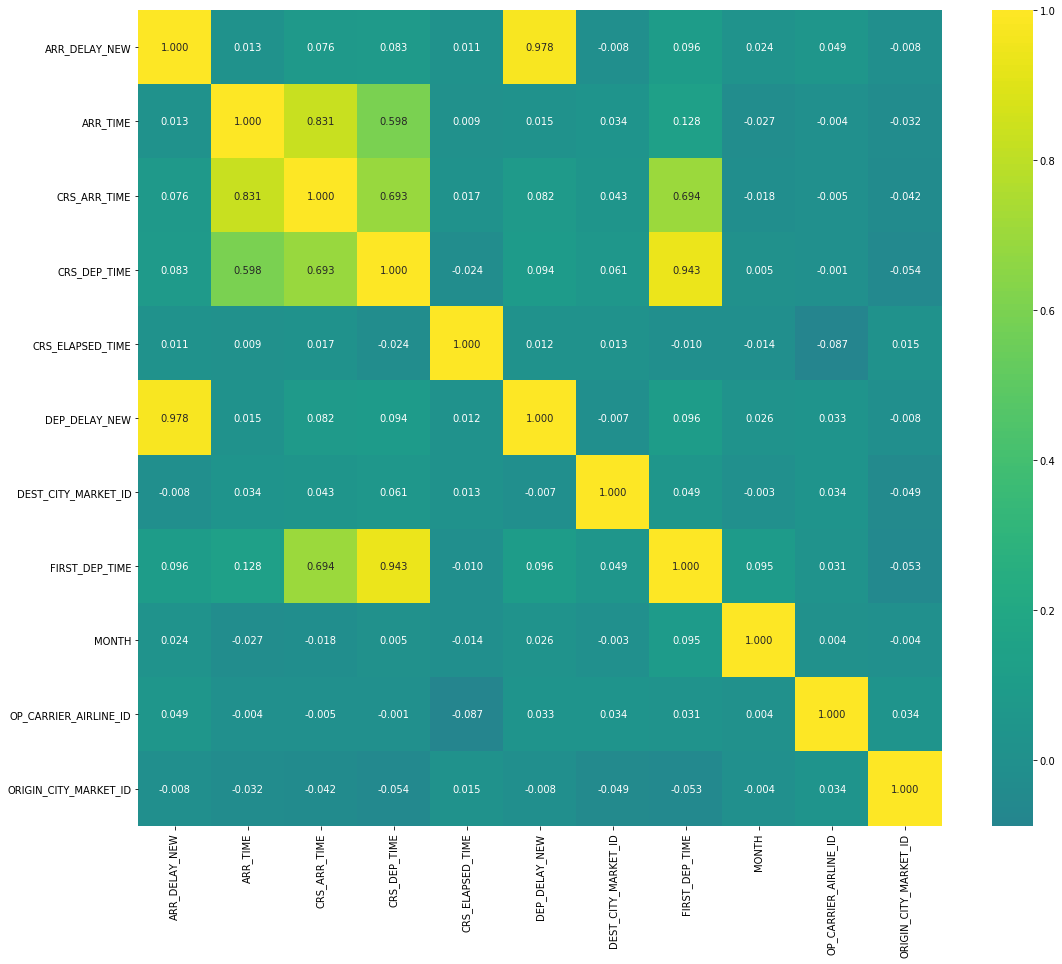

In [42]:
plt.figure(figsize = [18, 15]);

vars=[ 'ARR_DELAY_NEW',
                'ARR_TIME',
                'CRS_ARR_TIME',
                'CRS_DEP_TIME',
                'CRS_ELAPSED_TIME',
                'DEP_DELAY_NEW',             
                'DEST',
                'DEST_CITY_MARKET_ID',
                'FIRST_DEP_TIME',
                'MONTH',
                'OP_CARRIER',
                'OP_CARRIER_AIRLINE_ID',
                'ORIGIN',
                'ORIGIN_CITY_MARKET_ID']


sb.heatmap(df_ndely[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show();

###### Let us understand the relation between delay caterories and delays

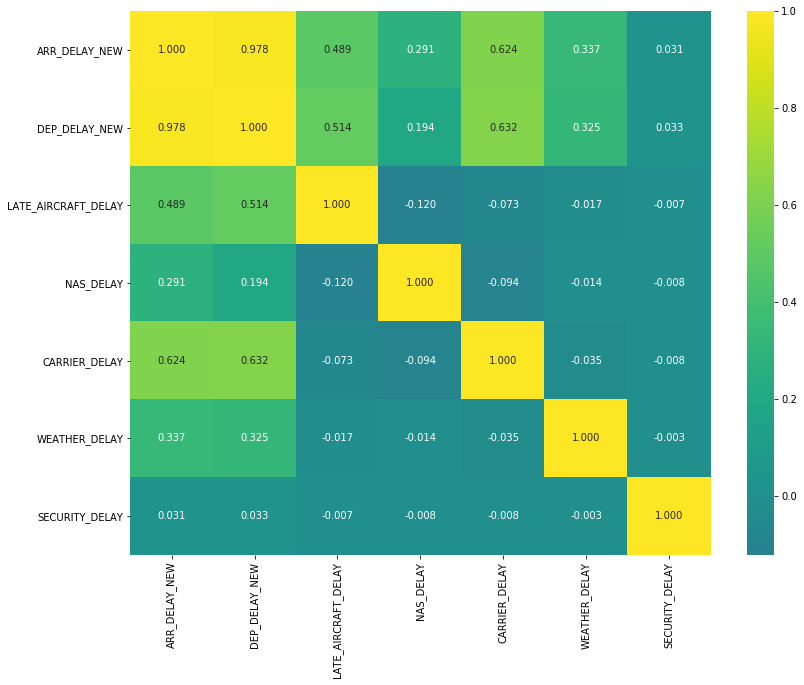

In [196]:
plt.figure(figsize = [13, 10]);

vars=[ 'ARR_DELAY_NEW',
       'DEP_DELAY_NEW',             
       'LATE_AIRCRAFT_DELAY',
       'NAS_DELAY',
       'CARRIER_DELAY',
       'WEATHER_DELAY',
       'SECURITY_DELAY',
      ]


sb.heatmap(df_ndely[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show();

###### Based on the ealier anlysis we understand the could be relation between catergory of delay and Arrival or Departure delay

> ######  The above heat map should,  Depature and Arrival delays are highly related. Carrier delay and Late Aircraft delays and Over all delays are fairly related.

###### Let us check pairwise relationships.  Arrival delay minutes by airports to understand if there are any relationship

In [43]:
a = df_H12019.groupby(by='DEST')['ARR_DELAY'].sum().sort_values(ascending=False)

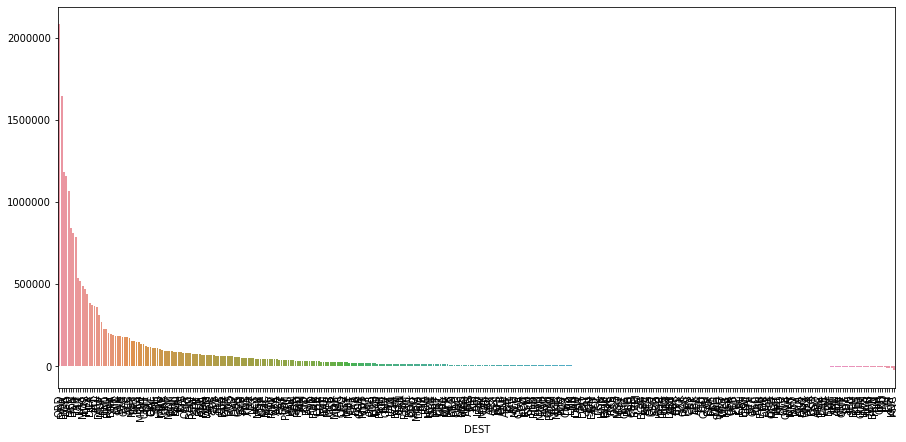

In [44]:
plt.figure(figsize=(15,7))
sb.barplot(x=a.index, y=a.values, order=a.index)
plt.xticks(rotation=90);

###### Let zoom in further to understand airport which caued more the 100k minutes and more delay H12019

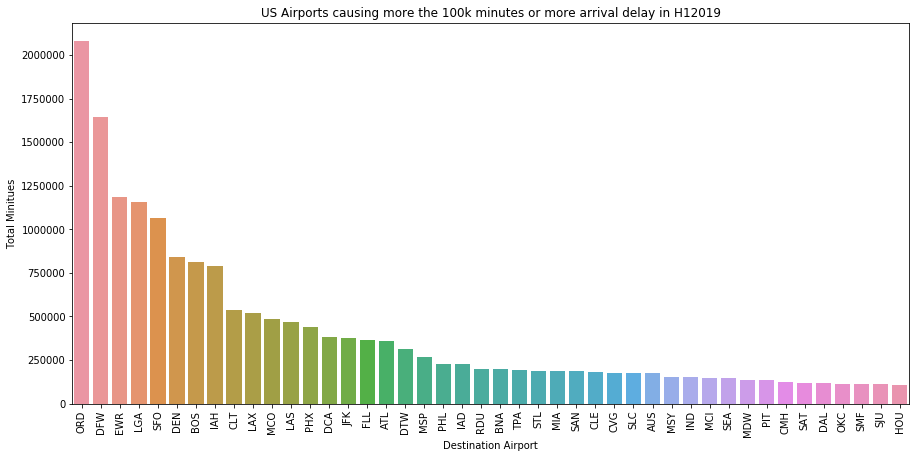

In [45]:
b = a[a > 100000]
plt.figure(figsize=(15,7))
sb.barplot(x=b.index, y=b.values, order=b.index)
plt.xticks(rotation=90);
plt.title('US Airports causing more the 100k minutes or more arrival delay in H12019');
plt.ylabel('Total Minitues');
plt.xlabel('Destination Airport');

###### We could understand that signficant delay is caused at ORD and DFW airports ( this are Chicago and Dallas Aiport)

###### Let is check mean and quratile delay for these airports 

In [46]:
c = df_H12019[df_H12019['DEST'].isin(b.index.values)]

In [47]:
d = b.index.values
d

array(['ORD', 'DFW', 'EWR', 'LGA', 'SFO', 'DEN', 'BOS', 'IAH', 'CLT',
       'LAX', 'MCO', 'LAS', 'PHX', 'DCA', 'JFK', 'FLL', 'ATL', 'DTW',
       'MSP', 'PHL', 'IAD', 'RDU', 'BNA', 'TPA', 'STL', 'MIA', 'SAN',
       'CLE', 'CVG', 'SLC', 'AUS', 'MSY', 'IND', 'MCI', 'SEA', 'MDW',
       'PIT', 'CMH', 'SAT', 'DAL', 'OKC', 'SMF', 'SJU', 'HOU'],
      dtype=object)

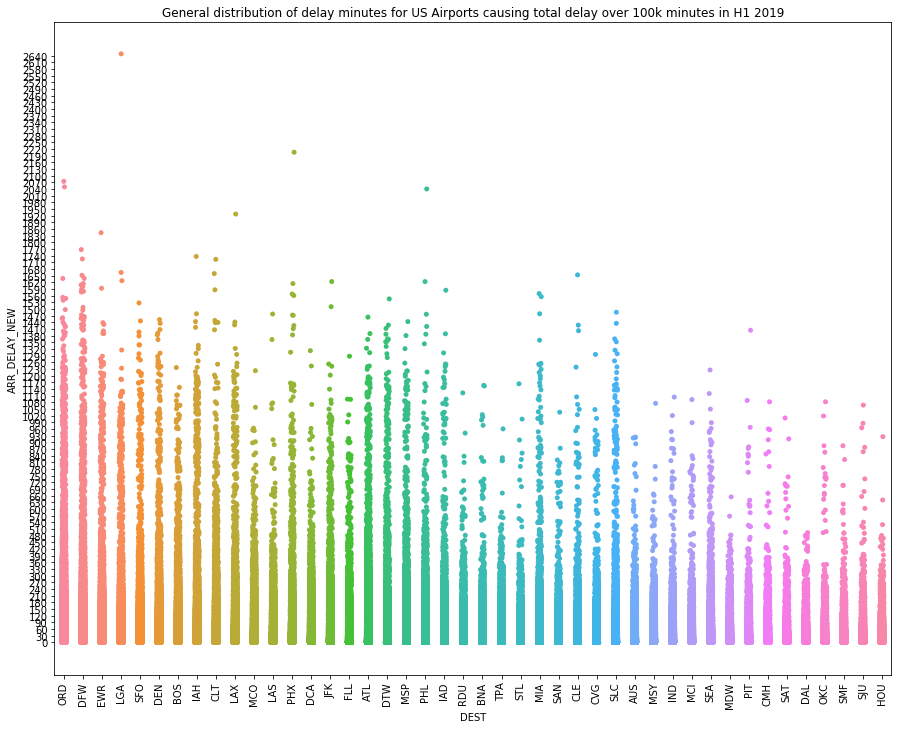

In [48]:
plt.figure(figsize=(15,12))
sb.stripplot(data=c, x='DEST', y='ARR_DELAY_NEW', 
             order=d,
            )
plt.yticks(np.arange(0,c['ARR_DELAY_NEW'].max(),30));
plt.xticks(rotation=90);
plt.title('General distribution of delay minutes for US Airports causing total delay over 100k minutes in H1 2019');

###### General distribution of delay minutes for US Airports causing total delay over 10000 minutes in H1 2019

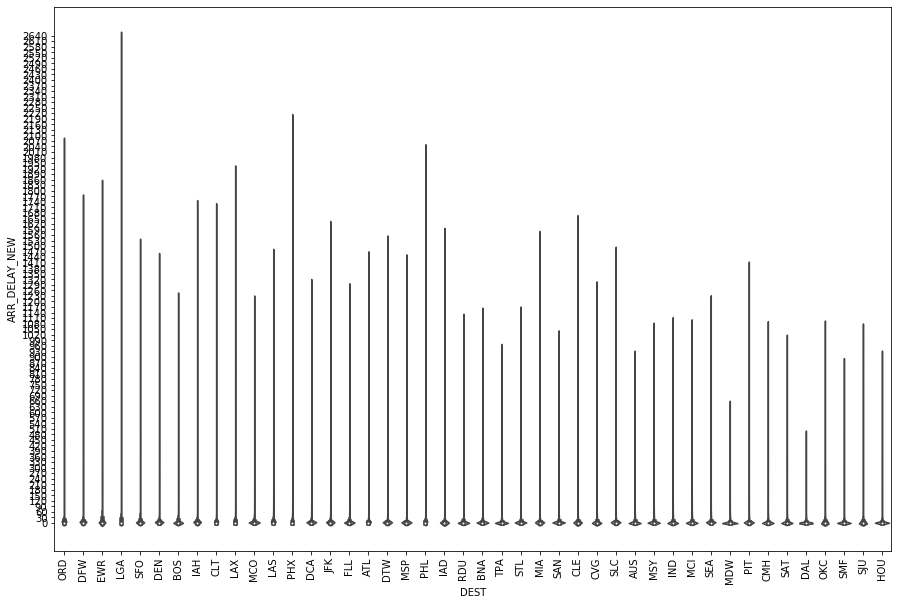

In [49]:
colour = sb.color_palette()[4]
plt.figure(figsize=(15,10))
sb.violinplot(data=c, x='DEST', y='ARR_DELAY_NEW', order=d)
plt.yticks(np.arange(0,c['ARR_DELAY_NEW'].max(),30));
plt.xticks(rotation=90);

###### We could observe that the mean and quartiles lies with in 60 miniutes time but there are many out-liers making the total delay minutes extremly high. Let us find out the distribution of arrival delays with in hour

In [50]:
df_60 = c[c['ARR_DELAY_NEW'] <= 60 ]

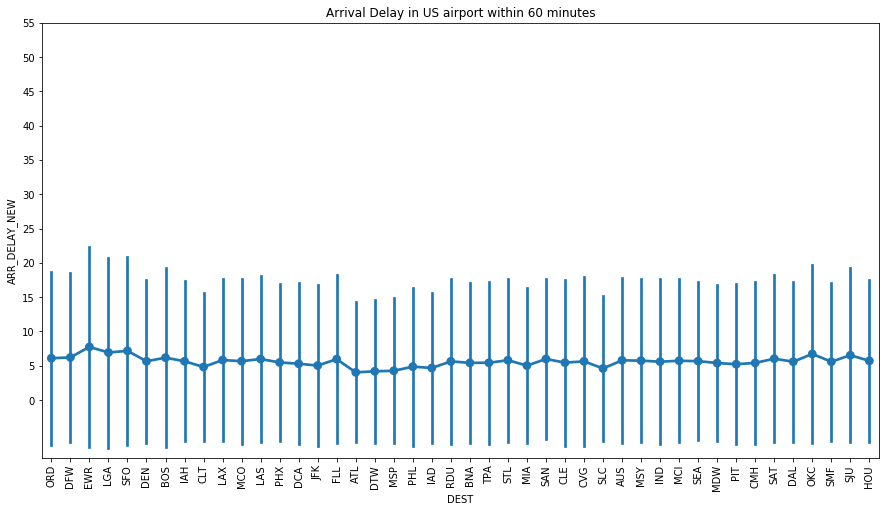

In [51]:
plt.figure(figsize=(15,8))
sb.pointplot(data=df_60, 
           x='DEST',
           y='ARR_DELAY_NEW',
           order=d,
           estimator=np.mean,
           ci='sd',
#            notch=True,
#            fliersize=1/3,
          )
plt.yticks(np.arange(0,df_60['ARR_DELAY_NEW'].max(),5));
plt.xticks(rotation=90);
plt.title('Arrival Delay in US airport within 60 minutes');

###### The mean delay minutes are 5 mintues and standard deviation is around  15 minutes which mean with in 60 minutes. Let is do the same analysis for more then 60 minutes delay

In [52]:
df_GT60 = c[c['ARR_DELAY_NEW'] > 60 ]

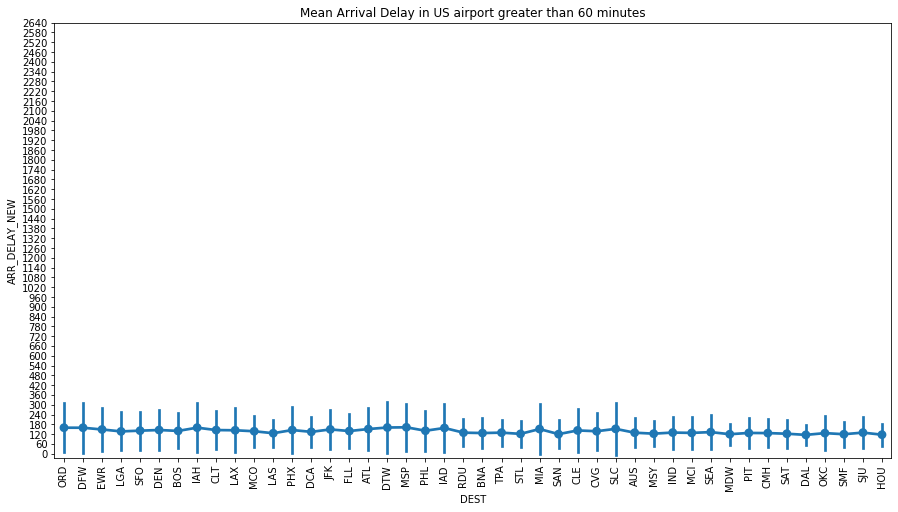

In [53]:
plt.figure(figsize=(15,8))
sb.pointplot(data=df_GT60, 
           x='DEST',
           y='ARR_DELAY_NEW',
           order=d,
           estimator=np.mean,
           ci='sd',
#            notch=True,
#            fliersize=1/3,
          )
plt.yticks(np.arange(0,df_GT60['ARR_DELAY_NEW'].max(),60));
plt.xticks(rotation=90);
plt.title('Mean Arrival Delay in US airport greater than 60 minutes');

###### When the delays are more than 60 minutes the mean delay minutes 180 mintues and standard deviation is around  150 minutes.  

###### Let us consider the Depatured delay by Airline as we earlier observer major cause of departure delay are due to Carrier and Late Arrival Delays

In [54]:
i = df_H12019.groupby(by='OP_UNIQUE_CARRIER')['DEP_DELAY'].sum().sort_values(ascending=False)

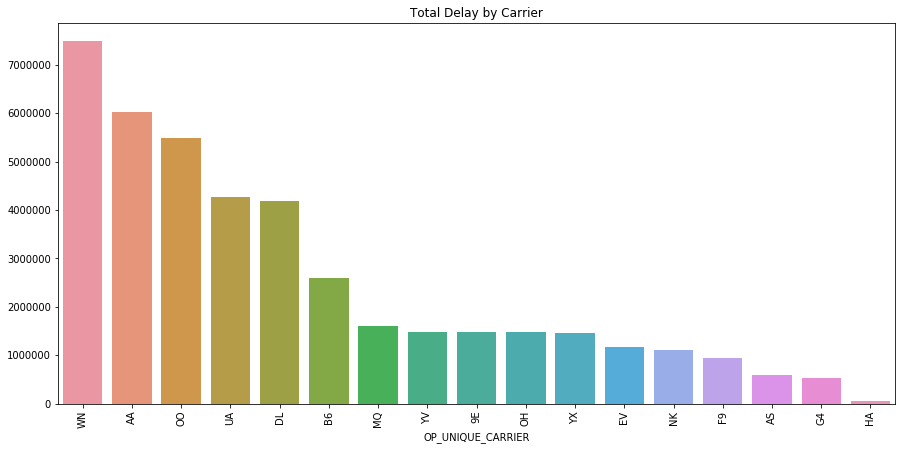

In [55]:
plt.figure(figsize=(15,7))
sb.barplot(x=i.index, y=i.values, order=i.index)
plt.xticks(rotation=90);
plt.title('Total Delay by Carrier');

###### Southwest Airlines (WN) has cause the most delays.  Hawaiian airlines (HA) has best track record of lowest cumulative delay minutes. Let us now understand  delay by trips which give much closer look of performace of airline

In [56]:
j = df_H12019.groupby(by='OP_UNIQUE_CARRIER')['DEP_DELAY'].mean().sort_values(ascending=False)

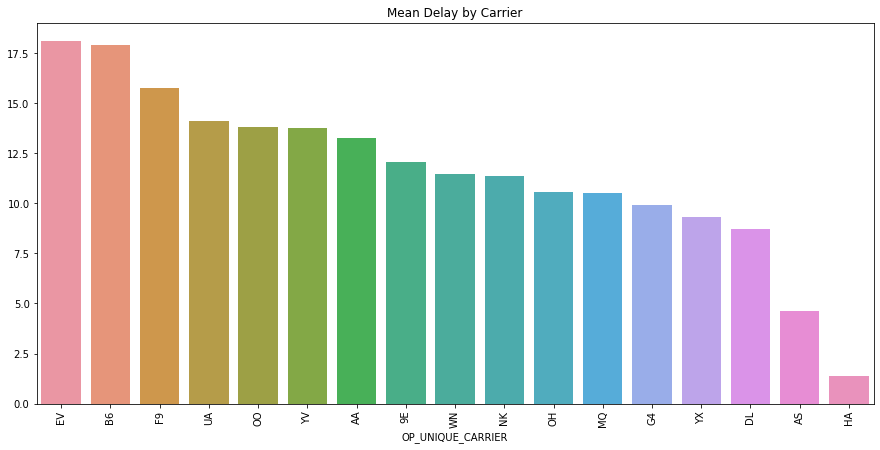

In [57]:
plt.figure(figsize=(15,7))
sb.barplot(x=j.index, y=j.values, order=j.index)
plt.xticks(rotation=90);
plt.title('Mean Delay by Carrier');

###### Eva Airline (EV) and Jetblue (B6) are worst peforming in terms of average delay times still Hawillian Airlines stands out.  

###### Let us consider if any     routes have worst timing performace. 

In [58]:
k = df_H12019
k['ROUTE'] = k['ORIGIN']+'-'+k['DEST']
k1 = k.groupby(by='ROUTE')['DEP_DELAY_NEW'].sum().sort_values(ascending=False)
k2 = k.groupby(by='ROUTE')['ARR_DELAY_NEW'].sum().sort_values(ascending=False)
k3 = k.groupby(by='ROUTE')['DEP_DELAY_NEW'].mean().sort_values(ascending=False)
k4 = k.groupby(by='ROUTE')['ARR_DELAY_NEW'].mean().sort_values(ascending=False)

###### Let us pick routes with total delay of 50000 minutes and more

In [59]:
k1 = k1[k1>50000]
k2 = k2[k2>50000]

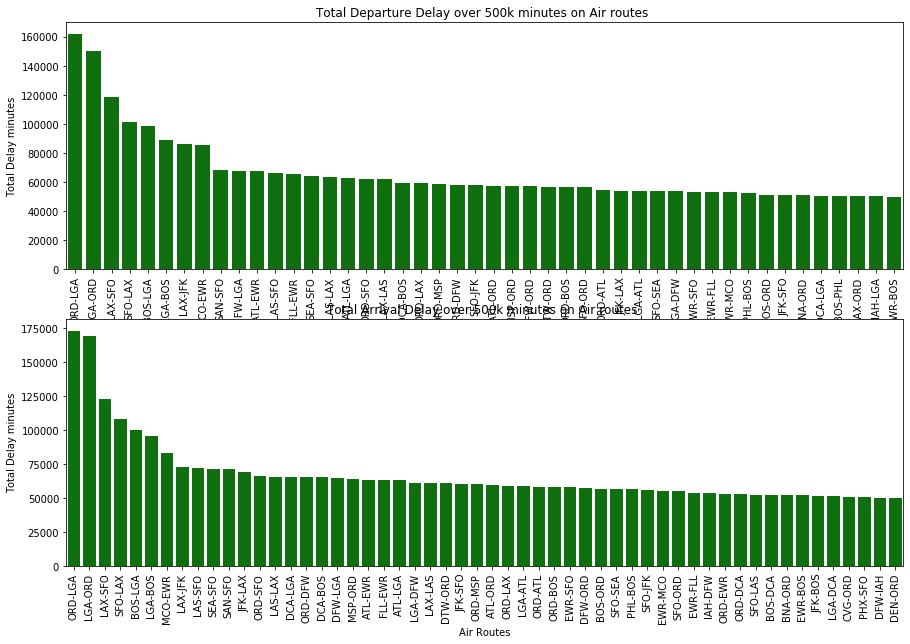

In [60]:
fig, ax = plt.subplots(nrows=2, figsize=[15,10])

sb.barplot(x=k1.index, 
           y=k1.values,
             color='g',
             order=k1.index,
             ax=ax[0]
            );
ax[0].set_xlabel('AIR routes')
ax[0].set_ylabel('Total Delay minutes')
xtl = ax[0].get_xticklabels()
ax[0].set_xticklabels(xtl, rotation=90)
ax[0].set_title('Total Departure Delay over 500k minutes on Air routes ')

sb.barplot(x=k2.index,
           y=k2.values,
           color='g',
           order=k2.index,
           ax=ax[1]
            );
plt.xlabel('Air Routes') 
ax[1].set_ylabel('Total Delay minutes')
xtl = ax[1].get_xticklabels()
ax[1].set_xticklabels(xtl, rotation=90)
ax[1].set_title('Total Arrival Delay over 500k minutes on Air routes ')



plt.show();

###### We could find the ORD to LGD and reverse direction are most delayed flights,  followed by SFO to LAX and reverse direction. This could be because of large number of flights between these airports. Mean minutes could give more clearer picture.

###### Let us pick routes with mean delay of 30 minutes and more

In [61]:
k3 = k3[k3 > 30.0]
k4 = k4[k4 > 30.0]

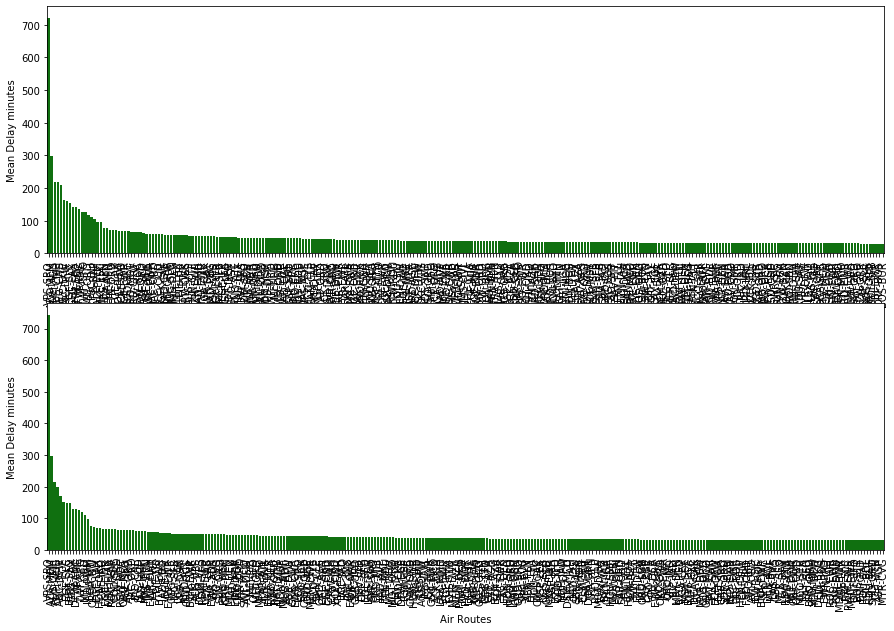

In [62]:
fig, ax = plt.subplots(nrows=2, figsize=[15,10])

sb.barplot(x=k3.index, 
           y=k3.values,
             color='g',
             order=k3.index,
             ax=ax[0]
            );
ax[0].set_xlabel('AIR routes')
ax[0].set_ylabel('Mean Delay minutes')
xtl = ax[0].get_xticklabels()
ax[0].set_xticklabels(xtl, rotation=90)

sb.barplot(x=k4.index,
           y=k4.values,
           color='g',
           order=k4.index,
           ax=ax[1]
            );
plt.xlabel('Air Routes') 
ax[1].set_ylabel('Mean Delay minutes')
xtl = ax[1].get_xticklabels()
ax[1].set_xticklabels(xtl, rotation=90)


plt.show();

###### Let us zoom it further to mean delay of 60  minutes to understand  routes with regular delay

In [63]:
k5 = k3[k3 > 60.0]
k6 = k4[k4 > 60.0]

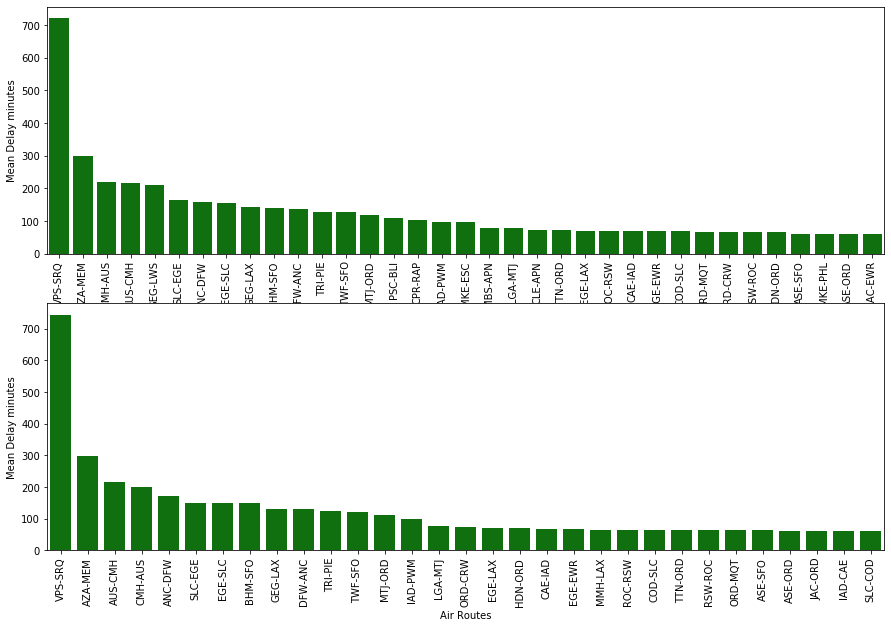

In [64]:
fig, ax = plt.subplots(nrows=2, figsize=[15,10])

sb.barplot(x=k5.index, 
           y=k5.values,
             color='g',
             order=k5.index,
             ax=ax[0]
            );
ax[0].set_xlabel('AIR routes')
ax[0].set_ylabel('Mean Delay minutes')
xtl = ax[0].get_xticklabels()
ax[0].set_xticklabels(xtl, rotation=90)

sb.barplot(x=k6.index,
           y=k6.values,
           color='g',
           order=k6.index,
           ax=ax[1]
            );
plt.xlabel('Air Routes') 
ax[1].set_ylabel('Mean Delay minutes')
xtl = ax[1].get_xticklabels()
ax[1].set_xticklabels(xtl, rotation=90)


plt.show();

###### Mean delay mintues shows a different picture.  When there a high mean shows consistant delays VSP to SRQ route has huge delays for both arrival and Departure minutes. Followed by AZA-MEM route.  We could plot to all the flight to and fron these airport to understand if this is the case.

###### Fort Wilton beach to Sarasota-Bradenton international is cause of most delays.  Both these airports are in Florida on south cost, Both these airports are not majoy airports and major routes.  AZA - Phonix Mesa Gateway airport to MEM - Memphis airport are showing next most average delays

###### Let us analyis delay by Flight numbers and flight tail Numbers

In [65]:
df_flnum = df_H12019
df_flnum['FL_NUM'] = df_flnum['OP_UNIQUE_CARRIER'] + df_flnum['OP_CARRIER_FL_NUM'].astype(str)

In [66]:
flnum1 = df_flnum.groupby(by='FL_NUM')['DEP_DELAY_NEW'].mean().sort_values(ascending=False)
flnum2 = df_flnum.groupby(by='FL_NUM')['ARR_DELAY_NEW'].mean().sort_values(ascending=False)

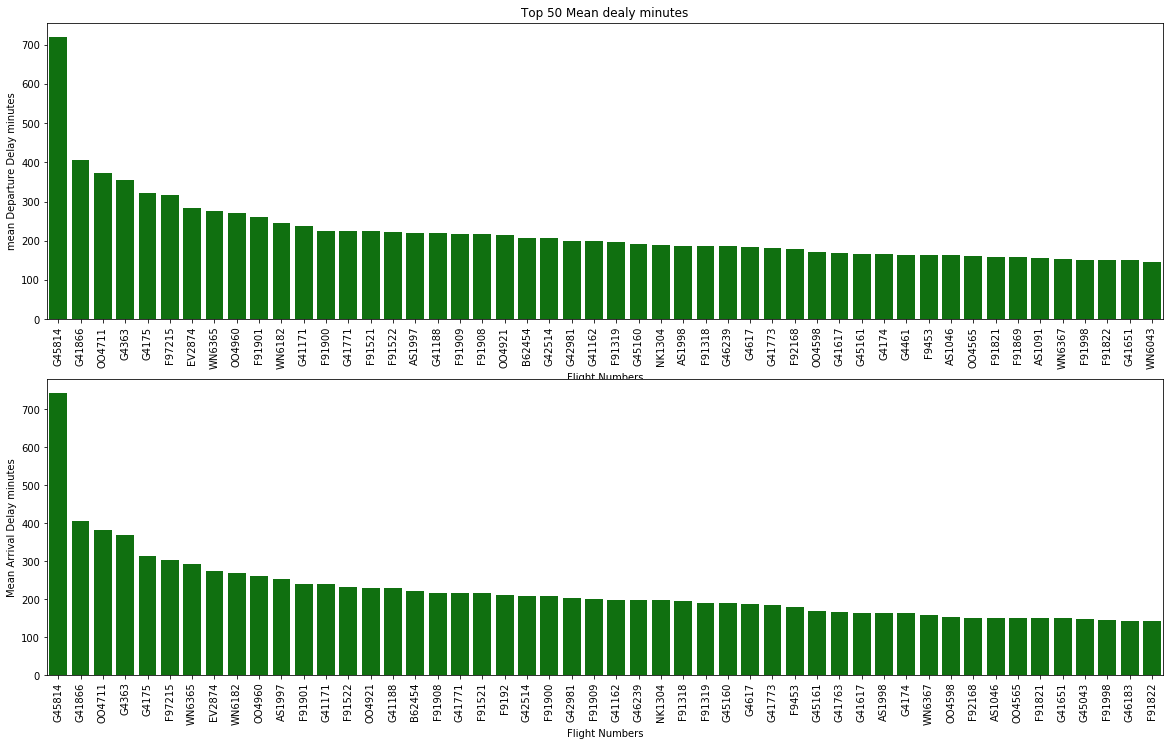

In [67]:
fig, ax = plt.subplots(nrows=2, figsize=[20,12])

sb.barplot(x=flnum1[:50].index, 
           y=flnum1[:50].values,
           color='g',
           order=flnum1[:50].index,
           ax=ax[0]
        );
ax[0].set_xlabel('Flight Numbers')
ax[0].set_ylabel('mean Departure Delay minutes')
xtl = ax[0].get_xticklabels()
ax[0].set_xticklabels(xtl, rotation=90)
ax[0].set_title('Top 50 Mean dealy minutes')

sb.barplot(x=flnum2[:50].index,
           y=flnum2[:50].values,
           color='g',
           order=flnum2[:50].index,
           ax=ax[1]
            );
plt.xlabel('Flight Numbers') 
ax[1].set_ylabel('Mean Arrival Delay minutes')
xtl = ax[1].get_xticklabels()
ax[1].set_xticklabels(xtl, rotation=90)


plt.show();

###### Notoriously fight number G45814 is causing maximum delay. But it seems to be private jet so we could omit this. OO4711 is next greatest delay causing flight 

###### Let us check the delay by Aircraft Tail Number that is any specific aircraft causing delays 

In [68]:
tlnum1 = df_H12019.groupby(by='TAIL_NUM')['DEP_DELAY_NEW'].mean().sort_values(ascending=False)
tlnum2 = df_H12019.groupby(by='TAIL_NUM')['ARR_DELAY_NEW'].mean().sort_values(ascending=False)

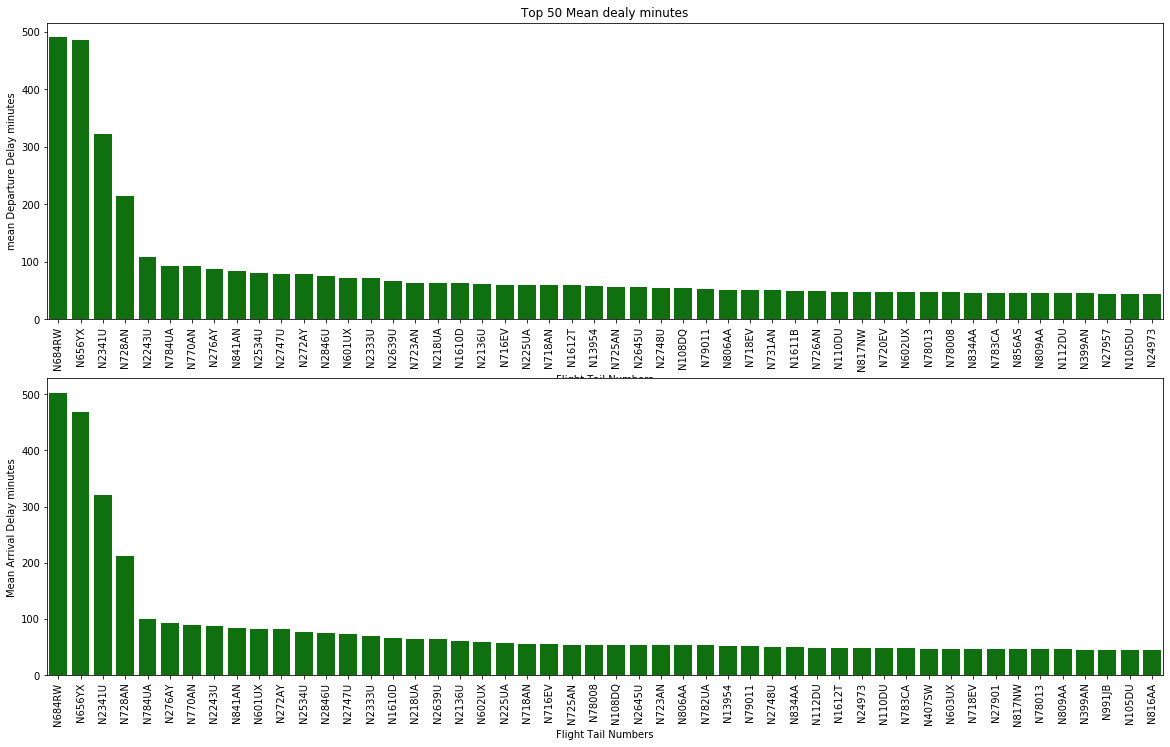

In [69]:
fig, ax = plt.subplots(nrows=2, figsize=[20,12])

sb.barplot(x=tlnum1[:50].index, 
           y=tlnum1[:50].values,
           color='g',
           order=tlnum1[:50].index,
           ax=ax[0]
        );
ax[0].set_xlabel('Flight Tail Numbers')
ax[0].set_ylabel('mean Departure Delay minutes')
xtl = ax[0].get_xticklabels()
ax[0].set_xticklabels(xtl, rotation=90)
ax[0].set_title('Top 50 Mean dealy minutes')

sb.barplot(x=tlnum2[:50].index,
           y=tlnum2[:50].values,
           color='g',
           order=tlnum2[:50].index,
           ax=ax[1]
            );
plt.xlabel('Flight Tail Numbers') 
ax[1].set_ylabel('Mean Arrival Delay minutes')
xtl = ax[1].get_xticklabels()
ax[1].set_xticklabels(xtl, rotation=90)


plt.show();

###### Only 4 flights have mean delays more than 100 minutes. N684RW', 'N656YX', 'N2341U', 'N728AN  We could further role in delays in combination with other factors

### The relationships observed in this part of the investigation. How  the feature(s) of interest vary with other features in the dataset is explained?

> **Airport vs Arrival Delay** On average 5 minutes delay for airports with more than 100k mnutes total delay and delay is less that 1 hours. When the delay is more than 1 hour the average delay is 180 minutes.

> **Airlines vs Departure delay** EVA airlines, and Jetblue airlines are worse performing airlines in term of average delay .They are at 17.5 minutes delay on average. 

> **Airport Routes** - Total delays is shown in Chiago to Newyork and LA to SFO routes because of relatively large number of flighys, The large mean delay is seen in minor airports and Minor routes in Florida and Phenix   

> **Flight Number** - There are few flight numbers especially flight OO4711 is greatest delay causing flights other than other private jets

> **Tail Numbers** - There are specific Air crafts causing delays are **N684RW, N656YX, N2341U, N728AN** 

###  Interesting relationships between the other features (not the main feature(s) of interest) are observed.

> Few AIRPORT, Routes, Aircrafts, Flight number are causing most delays. There are also some days and time of the day cusing delays. This will be investigated further in Multivariate analysis. 

## Multivariate Exploration

###### So for we have see that , Week of the day,  Time of the day, Specific routes, Airports and even specific aircrafts are causing delay.  
###### Departure delay have different reason from Arrival Delay.  Now we will consider combination these factor which cause delays
###### For each of these catergories let us find our Major cause of delay
>  ###### First Delay by Week days , time  of the day vs Cause of delay.  We have observed most delays in SUN, WED THU SAT and time of the day between 1500 to 2159  for Depature dealy and 1600 to 2359 for Arrival Delay

In [148]:
# Select only most delay causing days SUN, WED, THUs , SAT
df_w = df_H12019[df_H12019['DAY_OF_WEEK'].isin([1,4,5,7])]

# Select flight where the is 15 minutes or more arrival or departure delays
df_w = df_w.query('DEP_DELAY_GROUP > 0.0 | ARR_DELAY_GROUP > 0.0')

# Select more than flights with more than 15 mins arrival and departure delay.
df_wd = df_w.query('DEP_DEL15 > 0 and ARR_DEL15 > 0 ')

#select flights with departed in the hour blocks when most delays are seen ( 1500 - 2159)
df_wd = df_wd[df_wd['DEP_TIME_BLK'].isin(['1500-1559','1600-1659','1700-1759','1800-1859','1900-1959','2000-2059','2100-2159'])]

#Select flight which has no departure delays but more than 15 mins arrival delays
df_wa = df_w.query('DEP_DEL15 == 0 and ARR_DEL15 > 0')

#select flights in time block where most arrival delays are observed 1600 - 2359
df_wa = df_wa[df_wa['ARR_TIME_BLK'].isin(['1600-1659','1700-1759','1800-1859','1900-1959','2000-2059','2100-2159','2200-2259','2300-2359'])]

#
del df_w

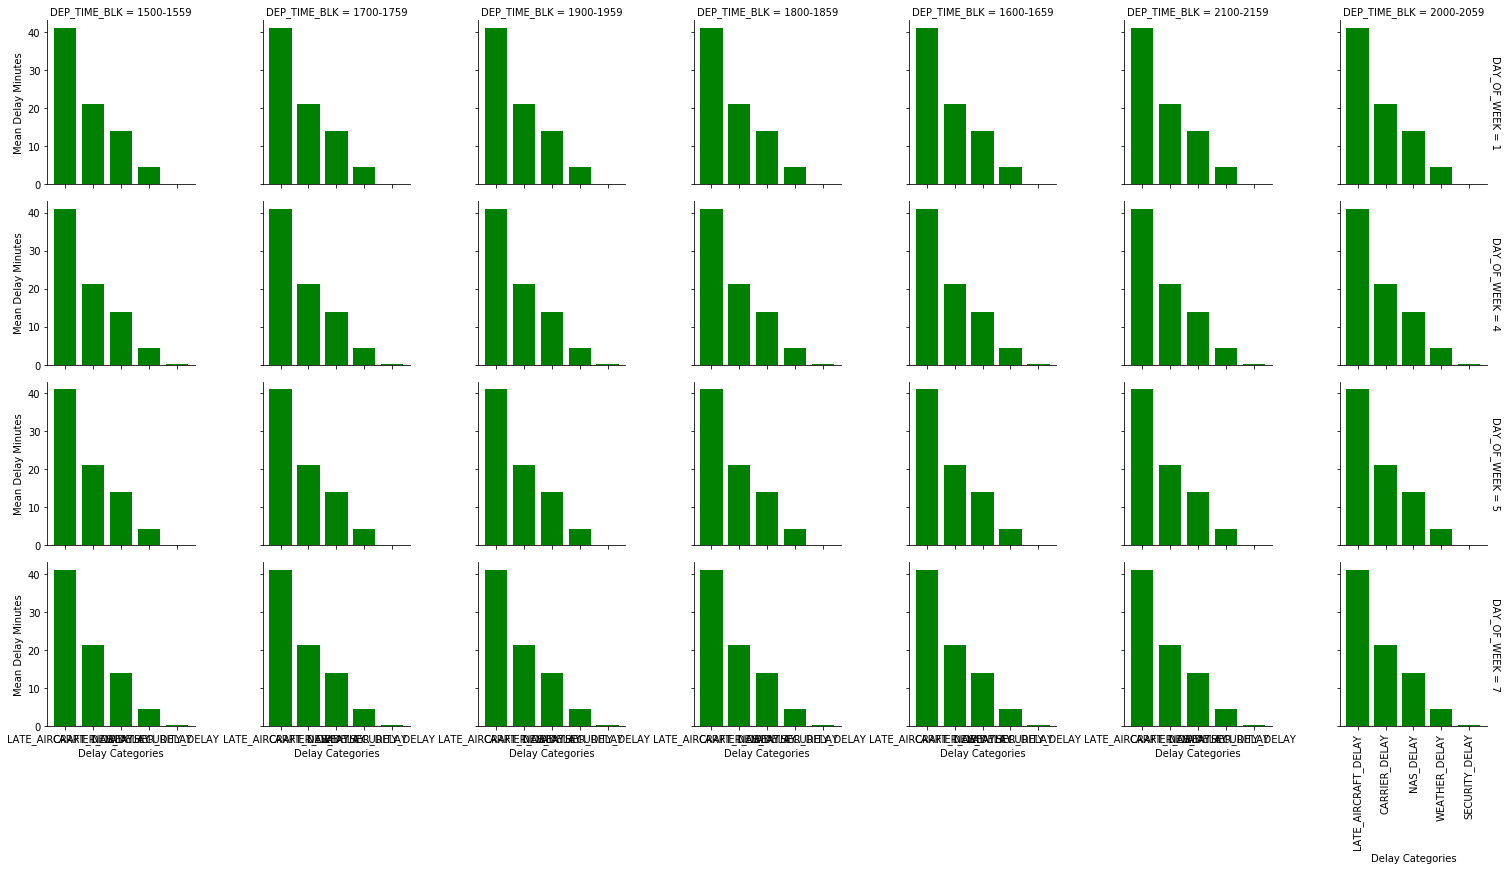

In [149]:
# create faceted heat maps Day of the week Time of the day and cause for delay for departures
g = sb.FacetGrid(data = df_wd, 
                 col = 'DEP_TIME_BLK',
                 row = 'DAY_OF_WEEK',
                 size = 3,
                 margin_titles = True,
                )

plt.xticks(rotation='vertical')

g.map(plt.bar,
      x=df_wd[['LATE_AIRCRAFT_DELAY', 'NAS_DELAY','CARRIER_DELAY','WEATHER_DELAY', 'SECURITY_DELAY']].mean().sort_values(ascending=False).index,
      height=df_wd[['LATE_AIRCRAFT_DELAY', 'NAS_DELAY','CARRIER_DELAY','WEATHER_DELAY', 'SECURITY_DELAY']].mean().sort_values(ascending=False).values,
      color = 'g', )

g.set_xlabels('Delay Categories')
g.set_ylabels('Mean Delay Minutes')

plt.show()

###### We could observer most of the delay are caused by late Aircraft catergory . Further drill down to understand which of the Airlines causing most of delays

In [150]:
# Get only records which has Late Aircraft Delay catergory 
df_wd1 = df_wd[df_wd['LATE_AIRCRAFT_DELAY'] > 0.0 ]
df_wd1.sample()

ACTUAL_ELAPSED_TIME  AIR_TIME  ARR_DEL15  ARR_DELAY  ARR_DELAY_GROUP  \
419926                103.0      86.0        1.0       19.0              1.0   

        ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  CANCELLED  \
419926           19.0    1934.0    1900-1959               NaN          0   

        CARRIER_DELAY  CRS_ARR_TIME  CRS_DEP_TIME  CRS_ELAPSED_TIME  \
419926            0.0          1915          1835             100.0   

        DAY_OF_MONTH  DAY_OF_WEEK  DEP_DEL15  DEP_DELAY  DEP_DELAY_GROUP  \
419926            28            4        1.0       16.0              1.0   

        DEP_DELAY_NEW  DEP_TIME DEP_TIME_BLK DEST  DEST_AIRPORT_ID  \
419926           16.0    1851.0    1800-1859  LAS            12889   

        DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID DEST_CITY_NAME  \
419926              1288903                32211  Las Vegas, NV   

       DEST_STATE_ABR  DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  DISTANCE  \
419926             NV               32        Nevada        85       519   

        DISTANCE_GROUP DIV1_AIRPORT  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  \
419926               3          NaN              NaN                  NaN   

        DIV1_LONGEST_GTIME DIV1_TAIL_NUM  DIV1_TOTAL_GTIME  DIV1_WHEELS_OFF  \
419926                 NaN           NaN               NaN              NaN   

        DIV1_WHEELS_ON  DIVERTED  DIV_ACTUAL_ELAPSED_TIME  \
419926             NaN         0                      NaN   

        DIV_AIRPORT_LANDINGS  DIV_ARR_DELAY  DIV_DISTANCE  DIV_REACHED_DEST  \
419926                     0            NaN           NaN               NaN   

        FIRST_DEP_TIME  FLIGHTS     FL_DATE  LATE_AIRCRAFT_DELAY  \
419926             NaN        1  2019-03-28                 16.0   

        LONGEST_ADD_GTIME  MONTH  NAS_DELAY OP_CARRIER  OP_CARRIER_AIRLINE_ID  \
419926                NaN      3        3.0         WN                  19393   

        OP_CARRIER_FL_NUM OP_UNIQUE_CARRIER ORIGIN  ORIGIN_AIRPORT_ID  \
419926                909                WN    BOI              10713   

        ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN_CITY_NAME  \
419926                1071302                  30713        Boise, ID   

       ORIGIN_STATE_ABR  ORIGIN_STATE_FIPS ORIGIN_STATE_NM  ORIGIN_WAC  \
419926               ID               16.0           Idaho        83.0   

        QUARTER  SECURITY_DELAY TAIL_NUM  TAXI_IN  TAXI_OUT  TOTAL_ADD_GTIME  \
419926        1             0.0   N762SW      5.0      12.0              NaN   

        WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR    ROUTE FL_NUM  
419926            0.0      1903.0     1929.0  2019  BOI-LAS  WN909

In [151]:
df_wd1.groupby(by='OP_UNIQUE_CARRIER')['LATE_AIRCRAFT_DELAY'].mean().sort_values(ascending=False).index

Index(['YV', 'UA', 'NK', '9E', 'F9', 'OH', 'B6', 'EV', 'OO', 'AS', 'YX', 'AA',
       'G4', 'DL', 'MQ', 'WN', 'HA'],
      dtype='object', name='OP_UNIQUE_CARRIER')

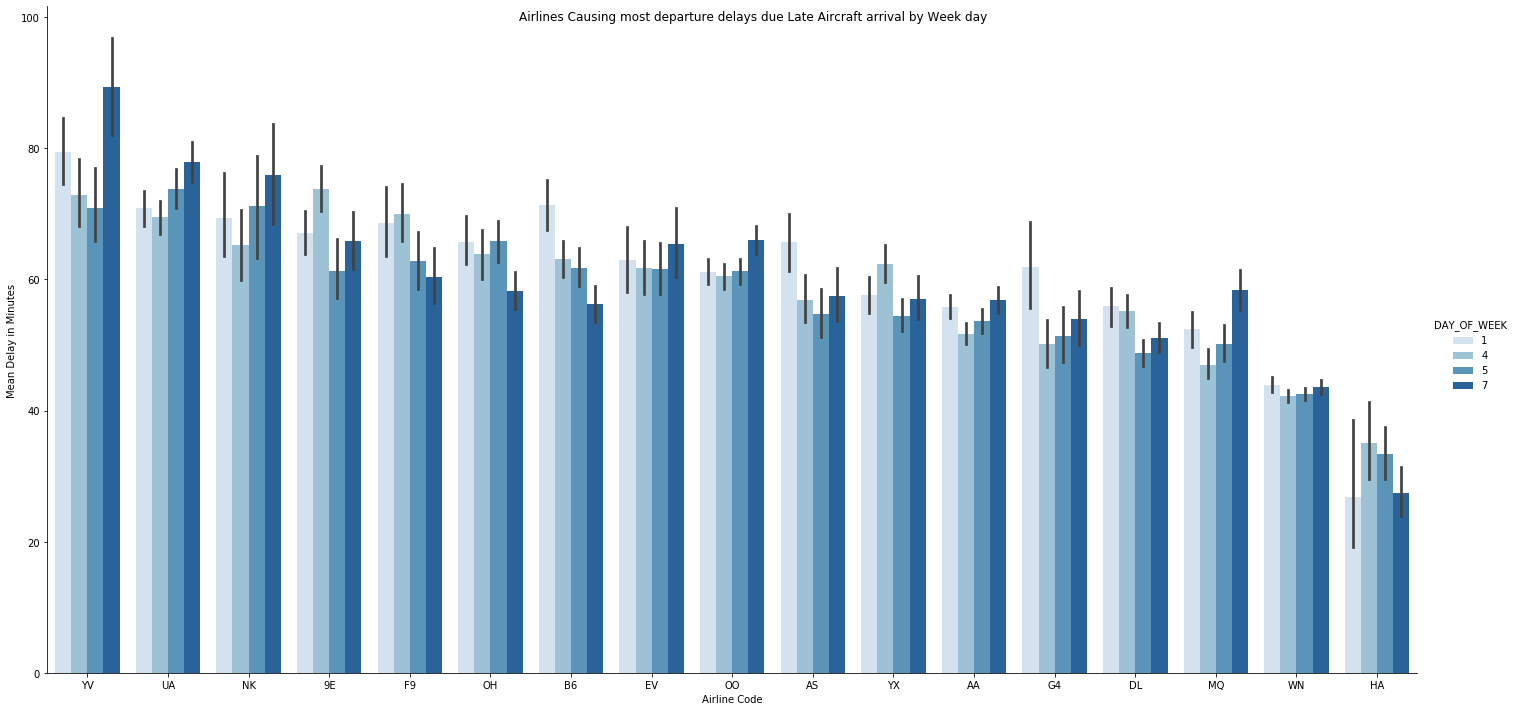

In [152]:
sb.catplot(data = df_wd1,
           x='OP_UNIQUE_CARRIER',
           y='LATE_AIRCRAFT_DELAY', 
           hue='DAY_OF_WEEK',
           kind='bar',
           height=10,
           aspect=2,
           palette = 'Blues',
           estimator=np.mean,
           order=df_wd1.groupby(by='OP_UNIQUE_CARRIER')['LATE_AIRCRAFT_DELAY'].mean().sort_values(ascending=False).index,
           )

plt.suptitle('Airlines Causing most departure delays due Late Aircraft arrival by Week day')
plt.xlabel('Airline Code');
plt.ylabel('Mean Delay in Minutes');
plt.show();

###### Clearly we can see YU- EuroAtalintic is least puntual followed by United Airlines are worst performers in punctuality.  We could observer average delay of 80 minutes for these airline during Saturdays.

##### Let us further drill down the cause due to any specfic aircraft causing delays  

In [153]:
df_wd2 = df_wd1[df_wd1['OP_UNIQUE_CARRIER'].isin(['YV','UA'])].sort_values(by='LATE_AIRCRAFT_DELAY',ascending=False)[:50]
df_wd2.sample()

ACTUAL_ELAPSED_TIME  AIR_TIME  ARR_DEL15  ARR_DELAY  ARR_DELAY_GROUP  \
157940                 92.0      76.0        1.0      660.0             12.0   

        ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  CANCELLED  \
157940          660.0    1018.0    2300-2359               NaN          0   

        CARRIER_DELAY  CRS_ARR_TIME  CRS_DEP_TIME  CRS_ELAPSED_TIME  \
157940            0.0          2318          2040              98.0   

        DAY_OF_MONTH  DAY_OF_WEEK  DEP_DEL15  DEP_DELAY  DEP_DELAY_GROUP  \
157940            27            4        1.0      666.0             12.0   

        DEP_DELAY_NEW  DEP_TIME DEP_TIME_BLK DEST  DEST_AIRPORT_ID  \
157940          666.0     746.0    2000-2059  DSM            11423   

        DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID  DEST_CITY_NAME  \
157940              1142307                31423  Des Moines, IA   

       DEST_STATE_ABR  DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  DISTANCE  \
157940             IA               19          Iowa        61       589   

        DISTANCE_GROUP DIV1_AIRPORT  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  \
157940               3          NaN              NaN                  NaN   

        DIV1_LONGEST_GTIME DIV1_TAIL_NUM  DIV1_TOTAL_GTIME  DIV1_WHEELS_OFF  \
157940                 NaN           NaN               NaN              NaN   

        DIV1_WHEELS_ON  DIVERTED  DIV_ACTUAL_ELAPSED_TIME  \
157940             NaN         0                      NaN   

        DIV_AIRPORT_LANDINGS  DIV_ARR_DELAY  DIV_DISTANCE  DIV_REACHED_DEST  \
157940                     0            NaN           NaN               NaN   

        FIRST_DEP_TIME  FLIGHTS     FL_DATE  LATE_AIRCRAFT_DELAY  \
157940             NaN        1  2019-06-27                660.0   

        LONGEST_ADD_GTIME  MONTH  NAS_DELAY OP_CARRIER  OP_CARRIER_AIRLINE_ID  \
157940                NaN      6        0.0         UA                  19977   

        OP_CARRIER_FL_NUM OP_UNIQUE_CARRIER ORIGIN  ORIGIN_AIRPORT_ID  \
157940               1597                UA    NaN              11292   

        ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN_CITY_NAME  \
157940                1129202                  30325              NaN   

       ORIGIN_STATE_ABR  ORIGIN_STATE_FIPS ORIGIN_STATE_NM  ORIGIN_WAC  \
157940              NaN                NaN             NaN         NaN   

        QUARTER  SECURITY_DELAY TAIL_NUM  TAXI_IN  TAXI_OUT  TOTAL_ADD_GTIME  \
157940        2             0.0   N73275      6.0      10.0              NaN   

        WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR ROUTE  FL_NUM  
157940            0.0       756.0     1012.0  2019   NaN  UA1597

In [154]:
df_wd2.groupby(by='TAIL_NUM')['LATE_AIRCRAFT_DELAY'].mean().sort_values(ascending=False).index[:50]

Index(['N852UA', 'N66837', 'N89304', 'N88330', 'N777UA', 'N521LR', 'N80343',
       'N902FJ', 'N221UA', 'N86322', 'N896UA', 'N37263', 'N37273', 'N89308',
       'N425UA', 'N89357', 'N841UA', 'N13227', 'N37437', 'N73251', 'N14102',
       'N588UA', 'N85354', 'N75851', 'N475UA', 'N28457', 'N88326', 'N87318',
       'N76514', 'N89313', 'N908FJ', 'N73275', 'N89315', 'N45440', 'N24202',
       'N809UA', 'N435UA', 'N489UA', 'N78285', 'N33132', 'N402UA', 'N496UA',
       'N26123', 'N76529', 'N77296', 'N33289', 'N467UA', 'N953LR'],
      dtype='object', name='TAIL_NUM')

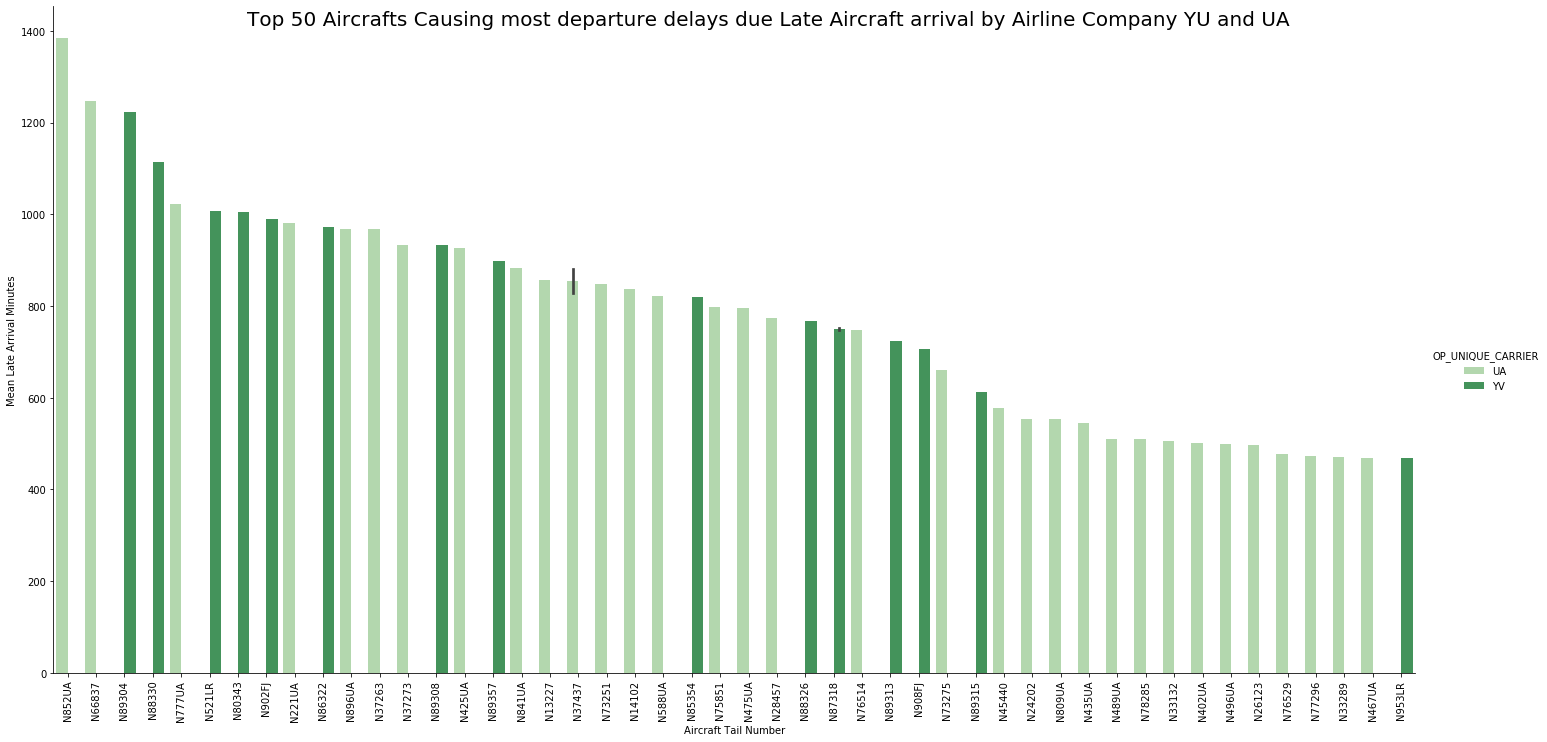

In [155]:
sb.catplot(data = df_wd2,
           x='TAIL_NUM',
           y='LATE_AIRCRAFT_DELAY', 
           hue='OP_UNIQUE_CARRIER',
           kind='bar',
           height=10,
           aspect=2,
           palette = 'Greens',
           order=df_wd2.groupby(by='TAIL_NUM')['LATE_AIRCRAFT_DELAY'].mean().sort_values(ascending=False).index,
           )

plt.suptitle('Top 50 Aircrafts Causing most departure delays due Late Aircraft arrival by Airline Company YU and UA',
            fontsize=20.0)
plt.xticks(rotation=90)
plt.xlabel('Aircraft Tail Number')
plt.ylabel('Mean Late Arrival Minutes')
plt.show();

###### We could clearly understand that top 50 flights of top 2 delay causing airline is around 600 minutes. 5 Airlines from UA and 3 from YU are causing more than 1000 minutes delays. We could further dril down to understand their routes of those aircraft to understand the distribution of Late Aircraft delay and Departure delay

Text(0, 0.5, 'Departure Delay in Minutes')

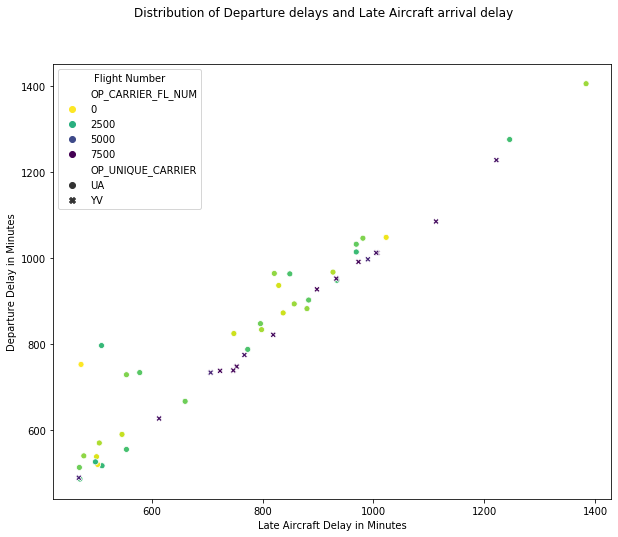

In [156]:
plt.figure(figsize=(10,8))
sb.scatterplot(data=df_wd2, 
           x='LATE_AIRCRAFT_DELAY',
           y='DEP_DELAY',
           hue='OP_CARRIER_FL_NUM',
           palette='viridis_r',
           style='OP_UNIQUE_CARRIER'
#               x_jitter=0.3,
#               y_jitter=0.3,
#               alpha=0.3)
              )
plt.legend(title='Flight Number')
plt.suptitle('Distribution of Departure delays and Late Aircraft arrival delay')
plt.xlabel('Late Aircraft Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')

######  We could understand YU flights departure delay is comensurate to the Late arrival delay . But we could  see UA airlines has further added to already late arrived flights.
> ###### We could clealy say UA is worst performing in flights UA2500 Houston,TX to Settle.WA & UA5000 Newyork to Clevland . 
> ###### YV flight ASH 7500 is the next worst performing next to UA fligths.

######  Ler us further continue the Analysis of Arrial Delays. We will for find the major reason for Arrival delays

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


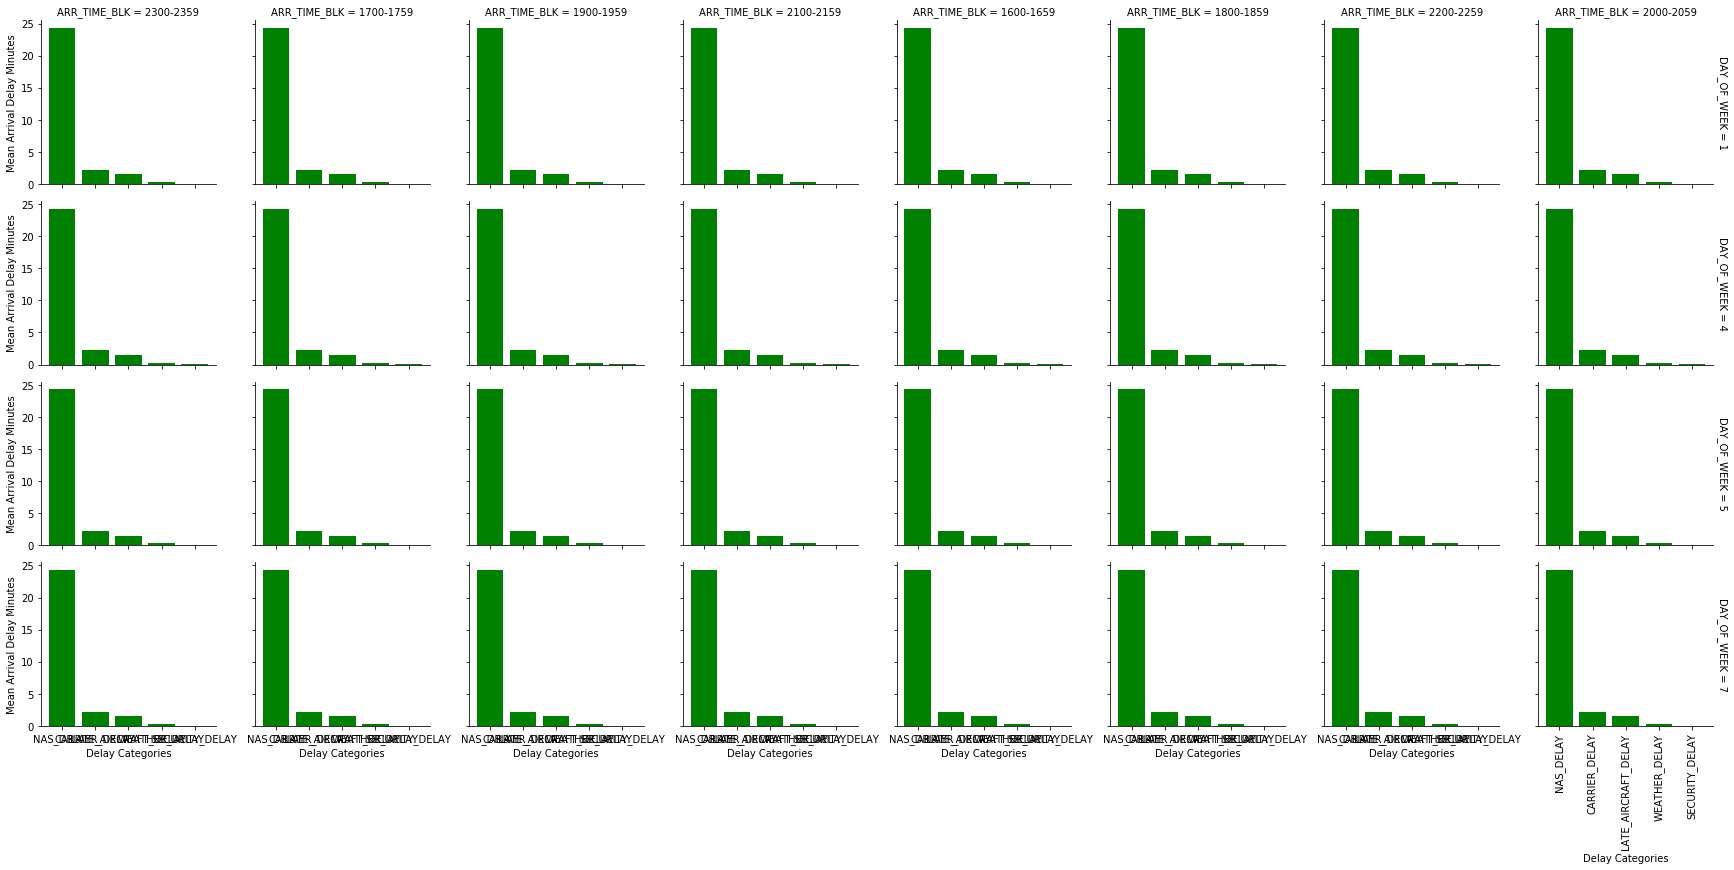

In [157]:
# create faceted heat maps Day of the week Time of the day and cause for delay for departures
g = sb.FacetGrid(data = df_wa, 
                 col = 'ARR_TIME_BLK',
                 row = 'DAY_OF_WEEK',
                 size = 3,
                 margin_titles = True,
                )

plt.xticks(rotation='vertical')

g.map(plt.bar,
      x=df_wa[['LATE_AIRCRAFT_DELAY', 'NAS_DELAY','CARRIER_DELAY','WEATHER_DELAY', 'SECURITY_DELAY']].mean().sort_values(ascending=False).index,
      height=df_wa[['LATE_AIRCRAFT_DELAY', 'NAS_DELAY','CARRIER_DELAY','WEATHER_DELAY', 'SECURITY_DELAY']].mean().sort_values(ascending=False).values,
      color = 'g', )

g.set_xlabels('Delay Categories')
g.set_ylabels('Mean Arrival Delay Minutes')

plt.show()

###### Above plots shows that single most prominent cause of Late Arrivals is NAS delays attributable air traffic congition at airport. We can further inverstiage any particuar airport is more congested at peak arrival time of the day

In [158]:
# Get only records which has NAS Delay catergory 
df_wa1 = df_wa[df_wa['NAS_DELAY'] > 0.0 ]
df_wa1.sample()

ACTUAL_ELAPSED_TIME  AIR_TIME  ARR_DEL15  ARR_DELAY  ARR_DELAY_GROUP  \
273530                390.0     354.0        1.0       19.0              1.0   

        ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  CANCELLED  \
273530           19.0    2244.0    2200-2259               NaN          0   

        CARRIER_DELAY  CRS_ARR_TIME  CRS_DEP_TIME  CRS_ELAPSED_TIME  \
273530            0.0          2225          1915             370.0   

        DAY_OF_MONTH  DAY_OF_WEEK  DEP_DEL15  DEP_DELAY  DEP_DELAY_GROUP  \
273530            10            7        0.0       -1.0             -1.0   

        DEP_DELAY_NEW  DEP_TIME DEP_TIME_BLK DEST  DEST_AIRPORT_ID  \
273530            0.0    1914.0    1900-1959  SFO            14771   

        DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID     DEST_CITY_NAME  \
273530              1477104                32457  San Francisco, CA   

       DEST_STATE_ABR  DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  DISTANCE  \
273530             CA                6    California        91      2457   

        DISTANCE_GROUP DIV1_AIRPORT  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  \
273530              10          NaN              NaN                  NaN   

        DIV1_LONGEST_GTIME DIV1_TAIL_NUM  DIV1_TOTAL_GTIME  DIV1_WHEELS_OFF  \
273530                 NaN           NaN               NaN              NaN   

        DIV1_WHEELS_ON  DIVERTED  DIV_ACTUAL_ELAPSED_TIME  \
273530             NaN         0                      NaN   

        DIV_AIRPORT_LANDINGS  DIV_ARR_DELAY  DIV_DISTANCE  DIV_REACHED_DEST  \
273530                     0            NaN           NaN               NaN   

        FIRST_DEP_TIME  FLIGHTS     FL_DATE  LATE_AIRCRAFT_DELAY  \
273530             NaN        1  2019-03-10                  0.0   

        LONGEST_ADD_GTIME  MONTH  NAS_DELAY OP_CARRIER  OP_CARRIER_AIRLINE_ID  \
273530                NaN      3       19.0         AS                  19930   

        OP_CARRIER_FL_NUM OP_UNIQUE_CARRIER ORIGIN  ORIGIN_AIRPORT_ID  \
273530               1127                AS    BWI              10821   

        ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN_CITY_NAME  \
273530                1082106                  30852    Baltimore, MD   

       ORIGIN_STATE_ABR  ORIGIN_STATE_FIPS ORIGIN_STATE_NM  ORIGIN_WAC  \
273530               MD               24.0        Maryland        35.0   

        QUARTER  SECURITY_DELAY TAIL_NUM  TAXI_IN  TAXI_OUT  TOTAL_ADD_GTIME  \
273530        1             0.0   N623VA     25.0      11.0              NaN   

        WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR    ROUTE  FL_NUM  
273530            0.0      1925.0     2219.0  2019  BWI-SFO  AS1127

In [169]:
# Group by destiation Aiport to find the mean NAS Delay by airport
df_wa2 = df_wa1.groupby(by='DEST')['NAS_DELAY'].mean().sort_values(ascending=False)
df_wa2.size

325

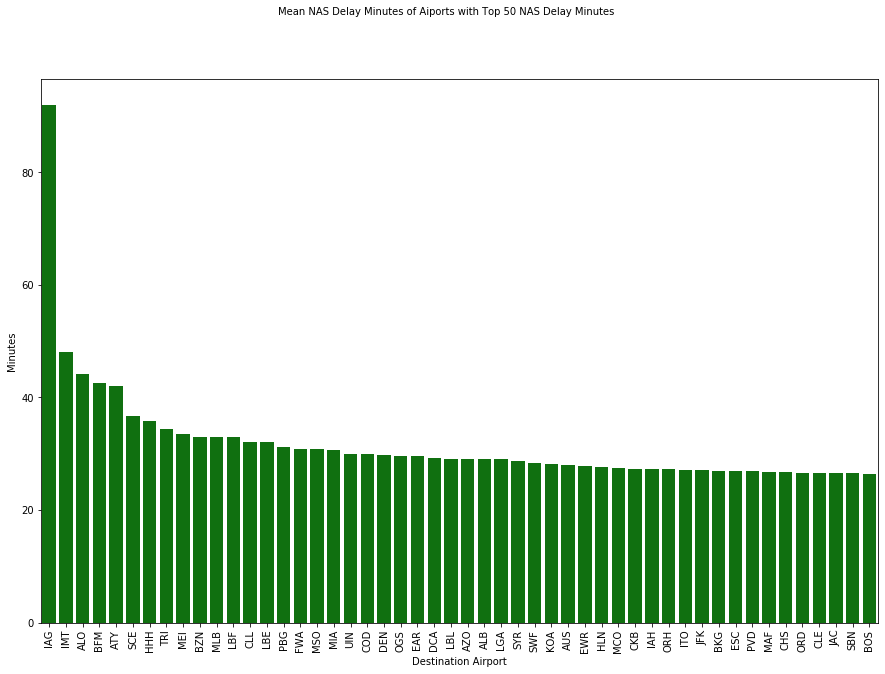

In [173]:
plt.figure(figsize=(15,10));
sb.barplot(df_wa2.index[:50], df_wa2.values[:50], color = 'g')
plt.xticks(rotation=90);
plt.suptitle('Mean NAS Delay Minutes of Aiports with Top 50 NAS Delay Minutes', fontsize=10);
plt.xlabel('Destination Airport');
plt.ylabel('Minutes');

plt.show();

###### We could see IAG - Niagra falls international Airport has extremly high delay due to NAS delay. IMT, ALO, BFM, ATY all have above 40 mins average NAS delay.  Let us concentrate of these Airports and check what time of the day has most arrival delays

###### Let us see the NAS delay vs Arrival Delay for top 5 airports

In [189]:
df_wa4 = df_H12019.query("DEST in ['IAG','IMT','ALO','BFM','ATY']").query("NAS_DELAY > 0.0")
df_wa4.sample()

ACTUAL_ELAPSED_TIME  AIR_TIME  ARR_DEL15  ARR_DELAY  ARR_DELAY_GROUP  \
48514                182.0     158.0        1.0       49.0              3.0   

       ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  CANCELLED  \
48514           49.0    1900.0    1800-1859               NaN          0   

       CARRIER_DELAY  CRS_ARR_TIME  CRS_DEP_TIME  CRS_ELAPSED_TIME  \
48514           23.0          1811          1424             167.0   

       DAY_OF_MONTH  DAY_OF_WEEK  DEP_DEL15  DEP_DELAY  DEP_DELAY_GROUP  \
48514            29            3        1.0       34.0              2.0   

       DEP_DELAY_NEW  DEP_TIME DEP_TIME_BLK DEST  DEST_AIRPORT_ID  \
48514           34.0    1458.0    1400-1459  BFM            10562   

       DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID DEST_CITY_NAME DEST_STATE_ABR  \
48514              1056202                30562     Mobile, AL             AL   

       DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  DISTANCE  DISTANCE_GROUP  \
48514                1       Alabama        51      1132               5   

      DIV1_AIRPORT  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  DIV1_LONGEST_GTIME  \
48514          NaN              NaN                  NaN                 NaN   

      DIV1_TAIL_NUM  DIV1_TOTAL_GTIME  DIV1_WHEELS_OFF  DIV1_WHEELS_ON  \
48514           NaN               NaN              NaN             NaN   

       DIVERTED  DIV_ACTUAL_ELAPSED_TIME  DIV_AIRPORT_LANDINGS  DIV_ARR_DELAY  \
48514         0                      NaN                     0            NaN   

       DIV_DISTANCE  DIV_REACHED_DEST  FIRST_DEP_TIME  FLIGHTS     FL_DATE  \
48514           NaN               NaN             NaN        1  2019-05-29   

       LATE_AIRCRAFT_DELAY  LONGEST_ADD_GTIME  MONTH  NAS_DELAY OP_CARRIER  \
48514                 11.0                NaN      5       15.0         F9   

       OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM OP_UNIQUE_CARRIER ORIGIN  \
48514                  20436                234                F9    DEN   

       ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  \
48514              11292                1129202                  30325   

      ORIGIN_CITY_NAME ORIGIN_STATE_ABR  ORIGIN_STATE_FIPS ORIGIN_STATE_NM  \
48514       Denver, CO               CO                8.0        Colorado   

       ORIGIN_WAC  QUARTER  SECURITY_DELAY TAIL_NUM  TAXI_IN  TAXI_OUT  \
48514        82.0        2             0.0   N336FR      9.0      15.0   

       TOTAL_ADD_GTIME  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR    ROUTE  \
48514              NaN            0.0      1513.0     1851.0  2019  DEN-BFM   

      FL_NUM  
48514  F9234

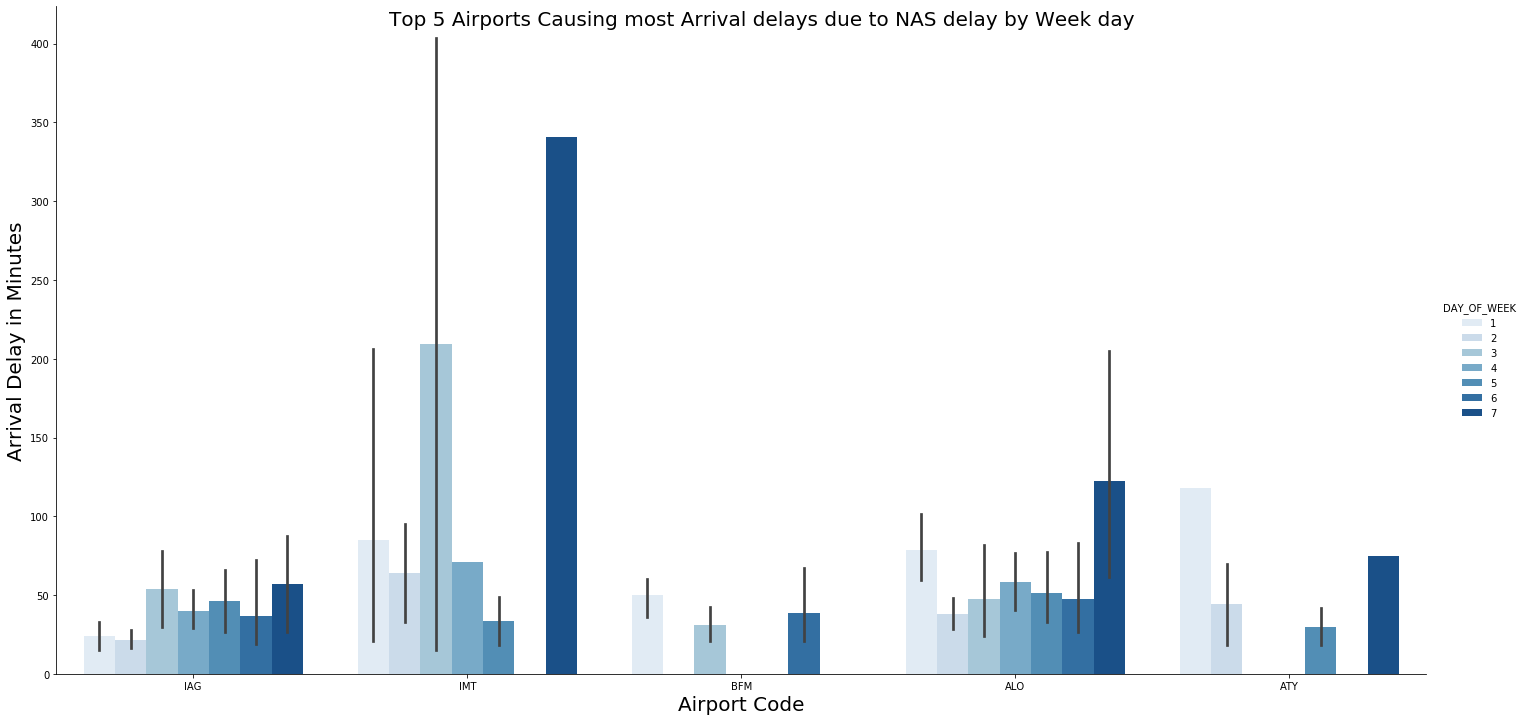

In [190]:

sb.catplot(data=df_wa4,
          x='DEST',
          y='ARR_DELAY_NEW',
          hue='DAY_OF_WEEK',
          kind='bar',
          height=10,
          aspect=2,
          palette = 'Blues',
          estimator=np.mean,
          order=df_wa3.groupby(by='DEST')['ARR_DELAY_NEW'].mean().sort_values(ascending=False).index,
           )

plt.suptitle('Top 5 Airports Causing most Arrival delays due to NAS delay by Week day',
            fontsize=20)
plt.xlabel('Airport Code', fontsize=20);
plt.ylabel('Arrival Delay in Minutes', fontsize=20);
plt.show();


###### We could observe that IAG and ALO airports have evenly distributed Arrival Delays. which shows , these airports are operating beyond its capacity to handle currently see high traffic.   IMT has spick on Saturday and Wednesdays, These day could have high number of flights landing,

In [179]:
# Select only top Destination with 40 mins or more Arrival delays
df_wa3 = df_wa1.query("DEST in ['IAG','IMT','ALO','BFM','ATY']")
df_wa3.sample()

ACTUAL_ELAPSED_TIME  AIR_TIME  ARR_DEL15  ARR_DELAY  ARR_DELAY_GROUP  \
66079                252.0     160.0        1.0       92.0              6.0   

       ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  CANCELLED  \
66079           92.0    2045.0    1900-1959               NaN          0   

       CARRIER_DELAY  CRS_ARR_TIME  CRS_DEP_TIME  CRS_ELAPSED_TIME  \
66079            0.0          1913          1633             160.0   

       DAY_OF_MONTH  DAY_OF_WEEK  DEP_DEL15  DEP_DELAY  DEP_DELAY_GROUP  \
66079             9            7        0.0        0.0              0.0   

       DEP_DELAY_NEW  DEP_TIME DEP_TIME_BLK DEST  DEST_AIRPORT_ID  \
66079            0.0    1633.0    1600-1659  IAG            12265   

       DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID     DEST_CITY_NAME  \
66079              1226505                32265  Niagara Falls, NY   

      DEST_STATE_ABR  DEST_STATE_FIPS DEST_STATE_NM  DEST_WAC  DISTANCE  \
66079             NY               36      New York        22      1069   

       DISTANCE_GROUP DIV1_AIRPORT  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  \
66079               5          NaN              NaN                  NaN   

       DIV1_LONGEST_GTIME DIV1_TAIL_NUM  DIV1_TOTAL_GTIME  DIV1_WHEELS_OFF  \
66079                 NaN           NaN               NaN              NaN   

       DIV1_WHEELS_ON  DIVERTED  DIV_ACTUAL_ELAPSED_TIME  \
66079             NaN         0                      NaN   

       DIV_AIRPORT_LANDINGS  DIV_ARR_DELAY  DIV_DISTANCE  DIV_REACHED_DEST  \
66079                     0            NaN           NaN               NaN   

       FIRST_DEP_TIME  FLIGHTS     FL_DATE  LATE_AIRCRAFT_DELAY  \
66079             NaN        1  2019-06-09                  0.0   

       LONGEST_ADD_GTIME  MONTH  NAS_DELAY OP_CARRIER  OP_CARRIER_AIRLINE_ID  \
66079                NaN      6       92.0         G4                  20368   

       OP_CARRIER_FL_NUM OP_UNIQUE_CARRIER ORIGIN  ORIGIN_AIRPORT_ID  \
66079                942                G4    NaN              14112   

       ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN_CITY_NAME  \
66079                1411206                  33195              NaN   

      ORIGIN_STATE_ABR  ORIGIN_STATE_FIPS ORIGIN_STATE_NM  ORIGIN_WAC  \
66079              NaN                NaN             NaN         NaN   

       QUARTER  SECURITY_DELAY TAIL_NUM  TAXI_IN  TAXI_OUT  TOTAL_ADD_GTIME  \
66079        2             0.0    309NV      4.0      88.0              NaN   

       WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR ROUTE FL_NUM  
66079            0.0      1801.0     2041.0  2019   NaN  G4942

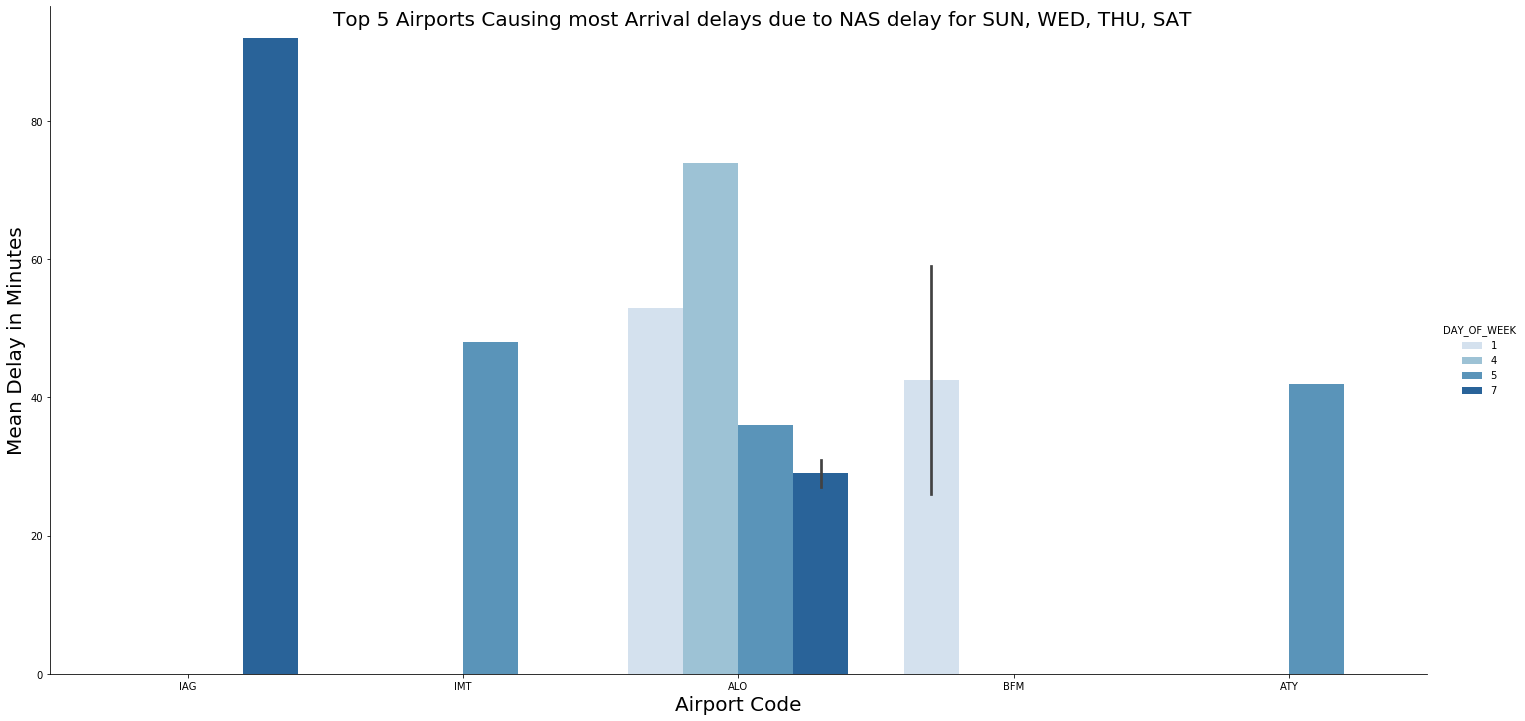

In [191]:
sb.catplot(data=df_wa3,
          x='DEST',
          y='NAS_DELAY',
          hue='DAY_OF_WEEK',
          kind='bar',
          height=10,
          aspect=2,
          palette = 'Blues',
          estimator=np.mean,
          order=df_wa3.groupby(by='DEST')['NAS_DELAY'].mean().sort_values(ascending=False).index,
           )

plt.suptitle('Top 5 Airports Causing most Arrival delays due to NAS delay for SUN, WED, THU, SAT',
            fontsize=20)
plt.xlabel('Airport Code', fontsize=20);
plt.ylabel('Mean Delay in Minutes', fontsize=20);
plt.show();

### The relationships observed in this part of the investigatio .There were features that strengthened each other in terms of looking at the feature(s) of interest.

> We have see Departure delays are primarly caused by Late Aircraft Arrival delay. This is attributable to the Airlines. 

> We could further see that YU and UA are worst performing Airline for departure delays. 

> We narrowed down to 3 flight numbers which have consistant delayed arrival. One of the routes is Houston to Settel and other is Newyork to Clevland

> The Arrival delays are more to do with NAS delays which are due to Airports ATS congession.

> IAG ,IMT, ALO, BFM, ATY are 5 most arrival delay causing airports.

> Futher breaking down by Day of the week IAG- Niagra falls Airport is congested only on Saturdays. IMT ford airports only on Thurdays. ALO Waterloo airport on Sundays, Wednesday, Thursday and Sundays,  but mostly on Wednesdays. BMF airport on Sundays . ATY airport on Saturdays.

> There should be reason for Air traffic congestion on these specific day for specific airport. These have to be further investigated to understand the root cause.

> IAG and ALO airports are looks to have fairly conjested air traffic, IMT is worst performing with Arrival delays peaking at 350 minutes on saturdays, This will certainly need closer examination.   

### There were few interesting or surprising interactions between features.

> The Saturdays have most delayed arrival aircrafts and Sundays have next most delayed arrivals

> Arrival delays are due to NAS delays and Departure delays are due to late arrival of Aircraft. 

> Flight number , Aircrafts cause most departure delays.  Some destination airports cause extreamly high arrival delays

> Carrier delays are the second most prominent cause of departure delays